## Описание проекта

   Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
    
   Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
    
   Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
    
- Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
- Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:

- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.


Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 4. Исследовательский анализ данных.
 5. Обучение модели линейной регрессии
 6. Обучение модели логистической регрессии
 7. Вывод

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:
- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Признаки в датасете ferma_main.csv можно разделить на группы.

- Характеристики коровы: id, Порода, порода папы_быка, Возраст.
- Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
- Характеристика пастбища: Тип пастбища.
- Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.
Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.

Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.
- Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from decimal import Decimal
from scipy import stats

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, recall_score, precision_score,confusion_matrix

from joblib import dump, load

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Загрузка данных

In [2]:
try:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv',sep = ';', decimal=',')
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv',sep = ';')
    cow_buy = pd.read_csv('/datasets/cow_buy.csv',sep = ';', decimal=',')
except:
    ferma_main = pd.read_csv('ferma_main.csv',sep = ';', decimal=',')
    ferma_dad = pd.read_csv('ferma_dad.csv',sep = ';')
    cow_buy = pd.read_csv('cow_buy.csv',sep = ';', decimal=',')

In [3]:
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


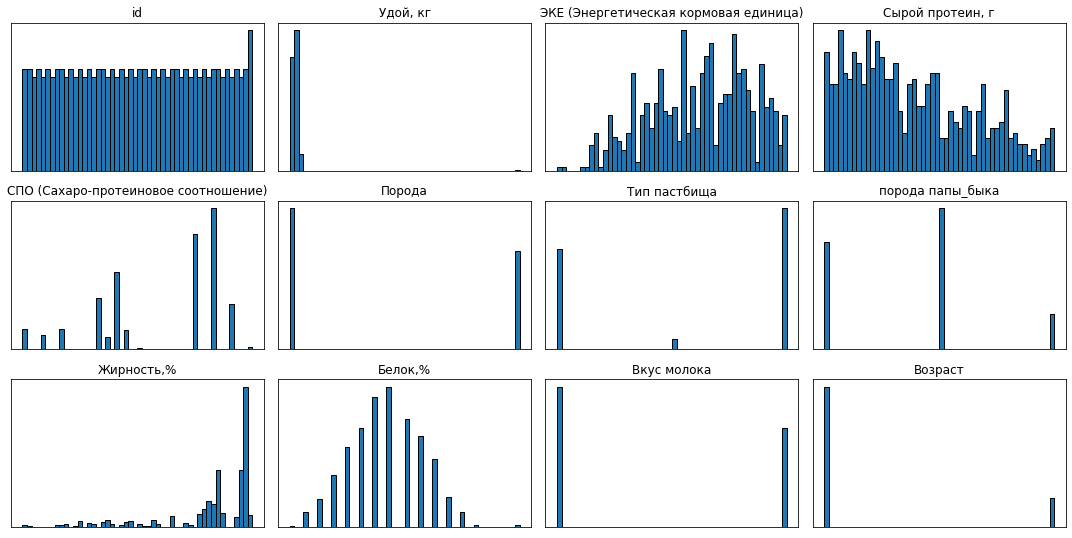

In [4]:
ferma_main_columns = ferma_main.columns  # Сохраняем названия столбцов DataFrame 'ferma_main' в переменную
figsize = (15, 10)  # Устанавливаем размер фигуры
fig = plt.figure(figsize=figsize)  # Создаем фигуру для графиков

for i, column in enumerate(ferma_main_columns):
    ax = fig.add_subplot(4, 4, i + 1)  # Создаем подграфик на сетке 4x4 
    ax.hist(ferma_main[column],bins = 50, ec='black' )  # Строим гистограмму для текущего столбца
    ax.set_title(column)  # Устанавливаем название подграфика, равное названию столбца
    ax.set_xticks([])  # Убираем метки на оси x
    ax.set_yticks([])  # Убираем метки на оси y

plt.tight_layout()  # Автоматически подгоняем размер подграфиков для лучшей компоновки
plt.show()  # Отображаем графики

In [5]:
ferma_main.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,634.0,NaN,NaN,NaN,317.460568,183.096982,1.0,159.25,317.5,475.75,629.0
"Удой, кг",634.0,NaN,NaN,NaN,6187.025237,1638.401021,5204.0,5751.75,6130.5,6501.0,45616.0
ЭКЕ (Энергетическая кормовая единица),634.0,NaN,NaN,NaN,14.542744,1.301301,10.9,13.5,14.7,15.6,16.8
"Сырой протеин, г",634.0,NaN,NaN,NaN,1922.682965,182.392548,1660.0,1772.25,1880.5,2058.75,2349.0
СПО (Сахаро-протеиновое соотношение),634.0,NaN,NaN,NaN,0.912855,0.032209,0.84,0.89,0.93,0.94,0.96
Порода,634,2,Вис Бик Айдиал,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Тип пастбища,634,3,Холмистое,356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
порода папы_быка,634,3,Соверин,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Жирность,%",634.0,NaN,NaN,NaN,3.603943,0.16802,2.99,3.59,3.65,3.72,3.75
"Белок,%",634.0,NaN,NaN,NaN,3.075666,0.00254,3.069,3.074,3.076,3.077,3.085


In [6]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

Видим, что в таблице ferma_main некоторые типы данных неправильные

In [7]:
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [8]:
ferma_dad.describe(include='all')

,id,Имя Папы
count,629.00000,629
unique,NaN,4
top,NaN,Барин
freq,NaN,240
mean,315.00000,NaN
std,181.72094,NaN
min,1.00000,NaN
25%,158.00000,NaN
50%,315.00000,NaN
75%,472.00000,NaN


In [9]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


В таблице ferma_dad - все типы данных правильные

In [10]:
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [11]:
cow_buy.describe(include='all')

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
count,20,20,20,20,20.000000,20.000000,20
unique,2,2,2,4,NaN,NaN,2
top,РефлешнСоверинг,равнинное,Соверин,Буйный,NaN,NaN,более_2_лет
freq,11,11,12,8,NaN,NaN,15
mean,NaN,NaN,NaN,NaN,3.577500,3.069500,NaN
std,NaN,NaN,NaN,NaN,0.126818,0.010339,NaN
min,NaN,NaN,NaN,NaN,3.340000,3.046000,NaN
25%,NaN,NaN,NaN,NaN,3.510000,3.064000,NaN
50%,NaN,NaN,NaN,NaN,3.590000,3.074000,NaN
75%,NaN,NaN,NaN,NaN,3.650000,3.076000,NaN


In [12]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


В таблице cow_buy - все типы данных правильные

**Вывод:**
- В таблице `ferma_main` и `cow_buy` некоторые типы данных указаны неверно.
- В таблице ferma_dad - все типы данных правильные
- В таблице cow_buy - все типы данных правильные

##  Предобработка данных

### Приведем все колонки к нижнему регистру

In [13]:
ferma_main.columns = ferma_main.columns.str.lower()
ferma_dad.columns = ferma_dad.columns.str.lower()
cow_buy.columns = cow_buy.columns.str.lower()
#df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in df.columns]

In [14]:
display(ferma_main.head()),display(ferma_dad.head()),display(cow_buy.head()),

,id,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


,id,имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


(None, None, None)

### Преобразуем данные в нужные типы.

Мы нашли, что в таблице ferma_main - есть много типов данных, которые надо преобразовать 

In [15]:
ferma_main.head()

,id,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [16]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   удой, кг                               634 non-null    int64  
 2   эке (энергетическая кормовая единица)  634 non-null    float64
 3   сырой протеин, г                       634 non-null    int64  
 4   спо (сахаро-протеиновое соотношение)   634 non-null    float64
 5   порода                                 634 non-null    object 
 6   тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   жирность,%                             634 non-null    float64
 9   белок,%                                634 non-null    float64
 10  вкус молока                            634 non-null    object 
 11  возрас

Такие как: 
- спо (сахаро-протеиновое соотношение) в int
- жирность,% в float
- белок,%  в float

Мы изменили тип данных, где это было необходимо.

###  Обработайте пропуски

ferma_main,ferma_dad,cow_buy

In [17]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   удой, кг                               634 non-null    int64  
 2   эке (энергетическая кормовая единица)  634 non-null    float64
 3   сырой протеин, г                       634 non-null    int64  
 4   спо (сахаро-протеиновое соотношение)   634 non-null    float64
 5   порода                                 634 non-null    object 
 6   тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   жирность,%                             634 non-null    float64
 9   белок,%                                634 non-null    float64
 10  вкус молока                            634 non-null    object 
 11  возрас

In [18]:
ferma_main.isna().sum()

id                                       0
удой, кг                                 0
эке (энергетическая кормовая единица)    0
сырой протеин, г                         0
спо (сахаро-протеиновое соотношение)     0
порода                                   0
тип пастбища                             0
порода папы_быка                         0
жирность,%                               0
белок,%                                  0
вкус молока                              0
возраст                                  0
dtype: int64

In [19]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [20]:
ferma_dad.isna().sum()

id          0
имя папы    0
dtype: int64

In [21]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   порода                   20 non-null     object 
 1   тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   имя_папы                 20 non-null     object 
 4   текущая_жирность,%       20 non-null     float64
 5   текущий_уровень_белок,%  20 non-null     float64
 6   возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [22]:
cow_buy.isna().sum()

порода                     0
тип пастбища               0
порода папы_быка           0
имя_папы                   0
текущая_жирность,%         0
текущий_уровень_белок,%    0
возраст                    0
dtype: int64

Как вы видим пропусков не наблюдается

### Дубликаты

In [23]:
ferma_main[ferma_main.duplicated()]

,id,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


In [24]:
ferma_main.duplicated().sum()

5

Полных дубликатов - 5

In [25]:
ferma_main = ferma_main.drop_duplicates()
ferma_main.duplicated().sum()

0

In [26]:
ferma_dad.duplicated().sum()

0

In [27]:
cow_buy.duplicated().sum()

4

In [28]:
cow_buy[cow_buy.duplicated()]#.sum()

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Видим, что есть 2 полных дубликата с индексом 8 и 14

In [29]:
len(cow_buy),2/20

(20, 0.1)

In [30]:
cow_buy = cow_buy.drop([cow_buy.index[8], cow_buy.index[14]])
cow_buy = cow_buy.reset_index(drop=True)
cow_buy

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет
9,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет


Мы избавились от 5ти явных дубликатов в таблице ferma_main и 2х в таблице cow_buy

### Неявные дубликаты

In [31]:
ferma_main['порода'].unique(),
ferma_main['тип пастбища'].unique(),
ferma_main['порода папы_быка'].unique(),
ferma_main['вкус молока'].unique(),
ferma_main['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [32]:
ferma_main['тип пастбища'] = ferma_main['тип пастбища'].replace('Равнинные','Равнинное')
ferma_main['порода папы_быка'] = ferma_main['порода папы_быка'].replace('Айдиалл','Айдиал')

ferma_main['тип пастбища'].unique(),ferma_main['порода папы_быка'].unique()

(array(['Равнинное', 'Холмистое'], dtype=object),
 array(['Айдиал', 'Соверин'], dtype=object))

In [33]:
ferma_dad['имя папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [34]:
cow_buy['порода'].unique(),
cow_buy['тип пастбища'].unique(),
cow_buy['порода папы_быка'].unique(),
cow_buy['имя_папы'].unique(),
cow_buy['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [35]:
cow_buy['тип пастбища'] = cow_buy['тип пастбища'].str.capitalize()
cow_buy['тип пастбища'].unique()

array(['Холмистое', 'Равнинное'], dtype=object)

Неявных дубликатов во всех таблицах не обнаружено

**Вывод** 
- Привели все названия колонок к нижнему регистру
- Мы изменили тип данных, где это было необходимо.
- Увидели, что пропусков не наблюдается
- Мы избавились от 5ти явных дубликатов в таблице ferma_main и 2х в таблице cow_buy
- Удалили неявные дубликаты

## Исследовательский анализ данных

### Статистический анализ таблицы `ferma_main`

In [36]:
ferma_main.head()

,id,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


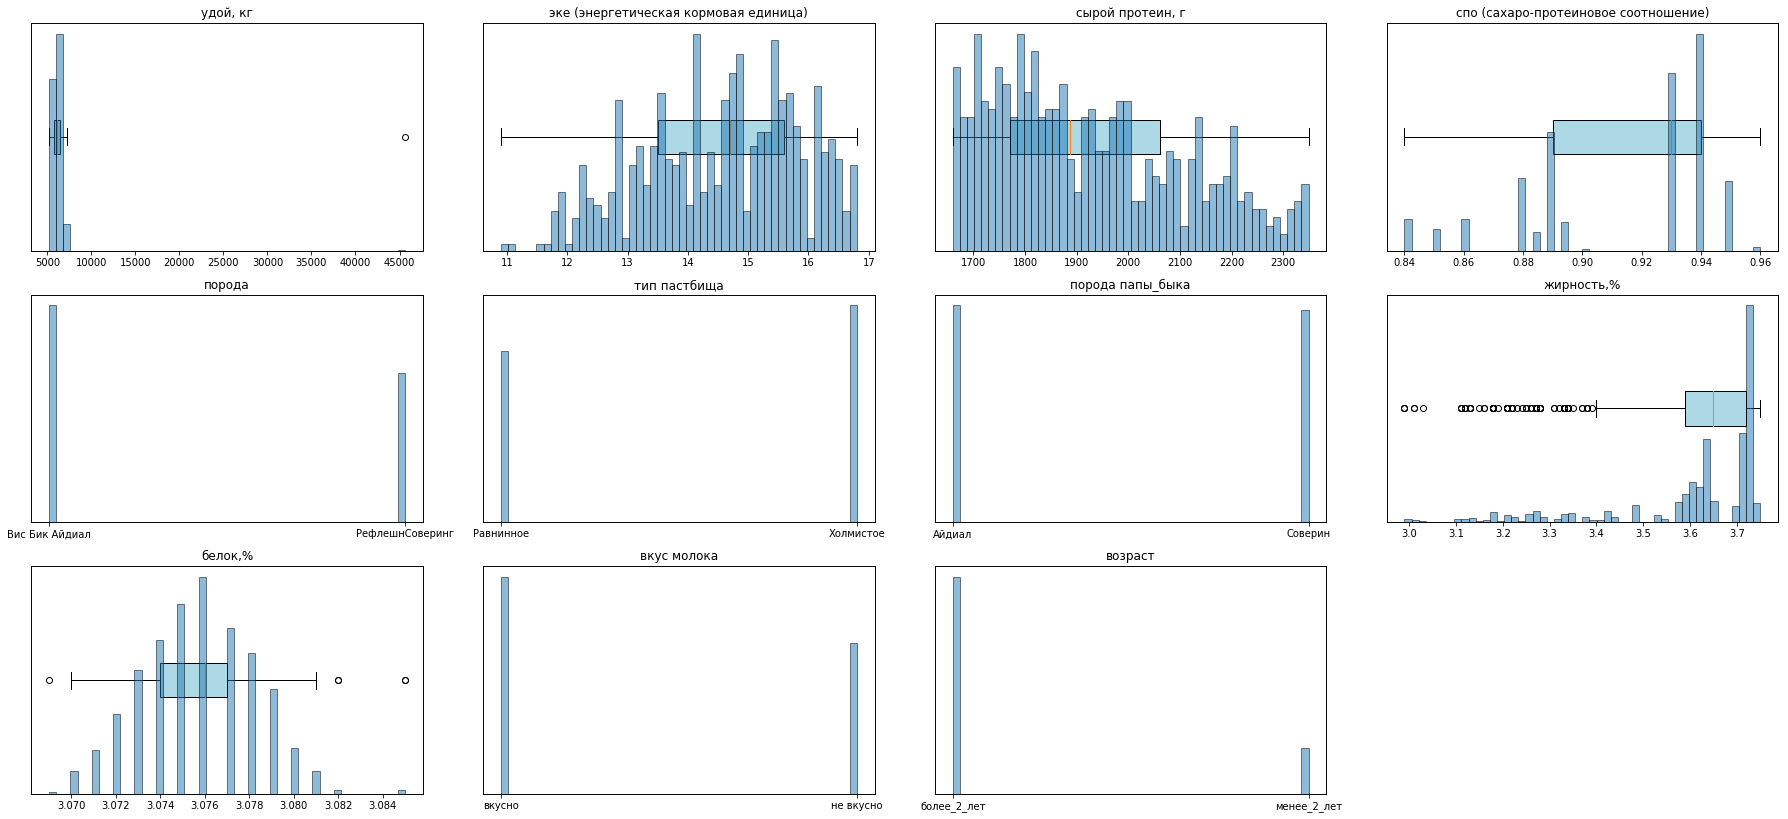

In [37]:
ferma_main_columns = ferma_main.columns
fig = plt.figure(figsize=(25, 15))

for i, column in enumerate(ferma_main_columns.drop('id')):
    ax = fig.add_subplot(4, 4, i + 1)  # Create subplot

    # Create two separate axes for histogram and boxplot
    ax_hist = ax.twinx()  

    # Plot histogram
    ax_hist.hist(ferma_main[column], bins=50, ec='black', alpha=0.5)  # Add alpha for transparency
    ax_hist.set_title(column) 

    # Plot boxplot
    if pd.api.types.is_integer_dtype(ferma_main[column]) or pd.api.types.is_float_dtype(ferma_main[column]): 
        ax.boxplot(ferma_main[column], vert=False, patch_artist=True, boxprops={'facecolor': 'lightblue'})

    ax.set_yticks([])  # Remove y-axis ticks for the boxplot axis
    ax_hist.set_yticks([])  # Remove y-axis ticks for the histogram axis

plt.tight_layout()
plt.show()


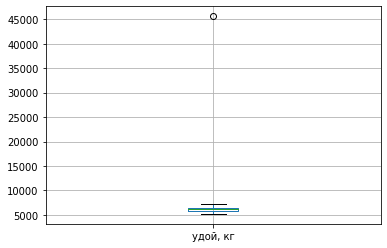

In [38]:
ferma_main.boxplot(column='удой, кг');

Видим выброс возле значения удой 45000

Есть только 1 выброс 

In [39]:
ferma_main['удой, кг'].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой, кг, dtype: float64

*Выброс удой, кг - это максимальное значение и оно равно 45616. Это явный выброс, потому что корова не может производить столько молока, об этом говорит и медиана и среднее. Удаляем его*

In [40]:
len(ferma_main[ferma_main['удой, кг']==45616])/len(ferma_main)

0.001589825119236884

In [41]:
ferma_main = ferma_main[ferma_main['удой, кг']!=45616]
ferma_main['удой, кг'].describe()

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой, кг, dtype: float64

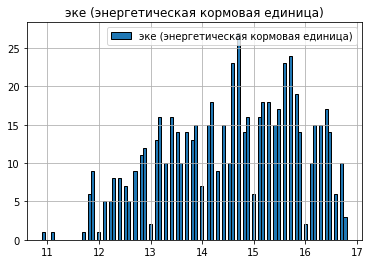

In [42]:
ferma_main.hist('эке (энергетическая кормовая единица)',bins = 100,ec='black', legend=True);

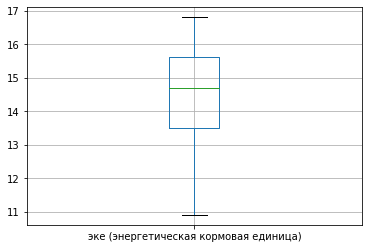

In [43]:
ferma_main.boxplot(column='эке (энергетическая кормовая единица)');


*По гистограмме и ящику с усами можно сказать, что выбросов  в эке (энергетическая кормовая единица) не обнаружено*

In [44]:
ferma_main['эке (энергетическая кормовая единица)'].describe()

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке (энергетическая кормовая единица), dtype: float64

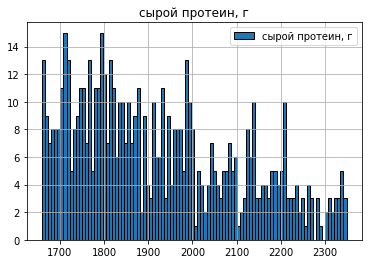

In [45]:
ferma_main.hist('сырой протеин, г',bins = 100,ec='black', legend=True);

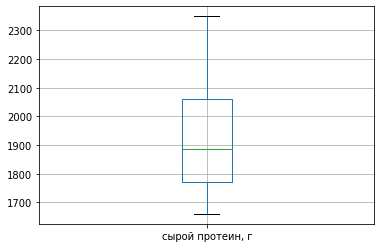

In [46]:
ferma_main.boxplot(column='сырой протеин, г');

*По гистограмме и ящику с усами можно сказать, что выбросов  в сырой протеин, г не обнаружено*

In [47]:
ferma_main['сырой протеин, г'].describe()

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: сырой протеин, г, dtype: float64

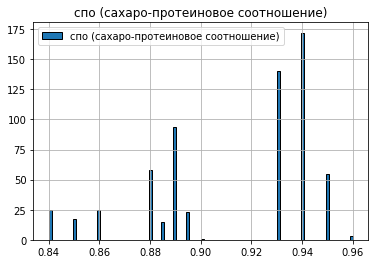

In [48]:
ferma_main.hist('спо (сахаро-протеиновое соотношение)',bins = 100,ec='black', legend=True);

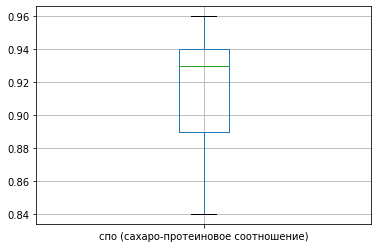

In [49]:
ferma_main.boxplot(column='спо (сахаро-протеиновое соотношение)');

In [50]:
ferma_main['спо (сахаро-протеиновое соотношение)'].describe()

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо (сахаро-протеиновое соотношение), dtype: float64

*По гистограмме и ящику с усами можно сказать, что выбросов  в сырой спо (сахаро-протеиновое соотношение) не обнаружено*

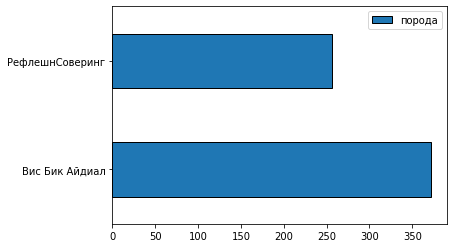

In [51]:
ferma_main['порода'].value_counts().plot.barh(ec='black', legend=True);

*Больше всего быков по породе Вис Бик Айдиал*

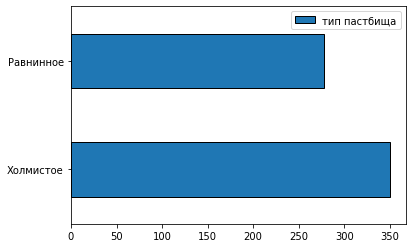

In [52]:
ferma_main['тип пастбища'].value_counts().plot.barh(ec='black', legend=True);

*Больше всего типов бастбищ - Холмистое, меньше всех Равнинных*

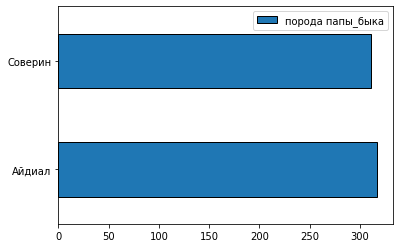

In [53]:
ferma_main['порода папы_быка'].value_counts().plot.barh(ec='black', legend=True);

*Больше всего быков из породы Соверин*

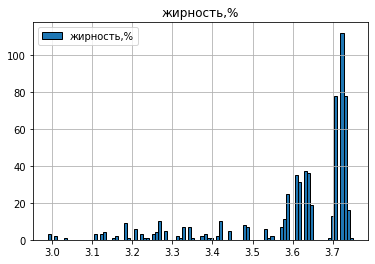

In [54]:
ferma_main.hist('жирность,%',bins = 100,ec='black', legend=True);

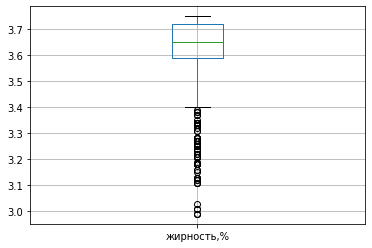

In [55]:
ferma_main.boxplot(column='жирность,%');

In [56]:
ferma_main['жирность,%'].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность,%, dtype: float64

Видим много выбросов в столбце жирность,%, но удалять их все не стоит

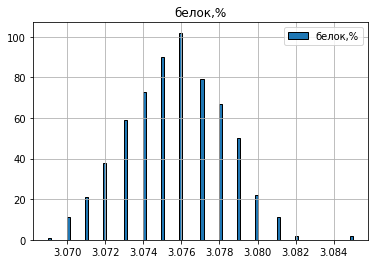

In [57]:
ferma_main.hist('белок,%',bins = 100,ec='black', legend=True);

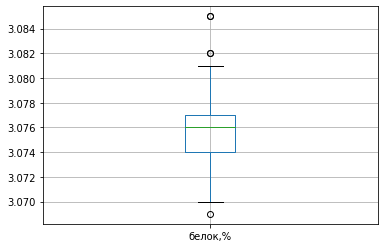

In [58]:
ferma_main.boxplot(column='белок,%');

Видим ровно 3 выброса, можем их оставить

In [59]:
ferma_main['белок,%'].describe()

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок,%, dtype: float64

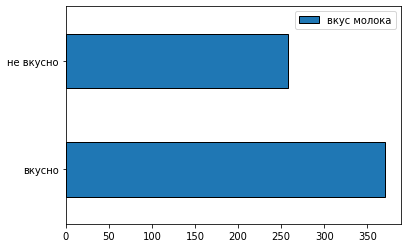

In [60]:
ferma_main['вкус молока'].value_counts().plot.barh(ec='black', legend=True);

*Обычно молоко - вкусное*

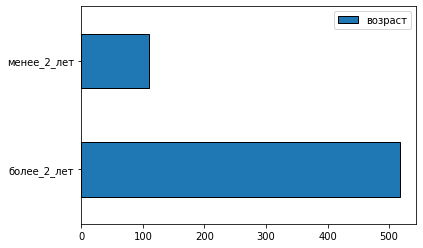

In [61]:
ferma_main['возраст'].value_counts().plot.barh(ec='black', legend=True);

*Возраст у коров обычно более 2х лет*

**Вывод**
- Выброс удой, кг  - это максимальное значение и оно равно 45616. Это явный выброс, потому что корова не может производить столько молока, об этом говорит и медиана и среднее. Удаляем его
- По гистограмме и ящику с усами можно сказать, что выбросов  в эке (энергетическая кормовая единица), сырой протеин, г,спо (сахаро-протеиновое соотношение) не обнаружено
- Видим много выбросов в столбце жирность,%, но удалять их все не стоит
- Увидели выбросы в таблице белок,%
- Обычно молоко - вкусное
- Возраст у коров обычно более 2х лет

### Статистический анализ таблицы `ferma_dad`

In [62]:
ferma_dad.head()

,id,имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


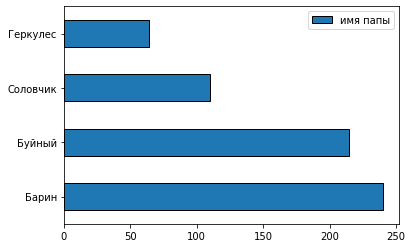

In [63]:
ferma_dad['имя папы'].value_counts().plot.barh(ec='black', legend=True);

Вывод:
- Больше всего имелось быков с именем Барин

### Статистический анализ таблицы `cow_buy`

In [64]:
cow_buy.head()

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


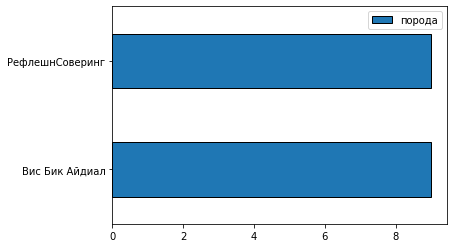

In [65]:
cow_buy['порода'].value_counts().plot.barh(ec='black', legend=True);

*количество быков разных пород - одинаковое*

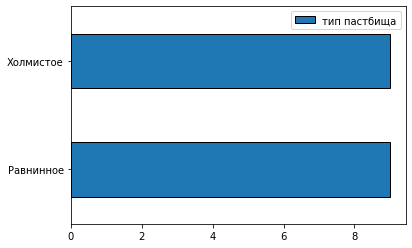

In [66]:
cow_buy['тип пастбища'].value_counts().plot.barh(ec='black', legend=True);

*Количество пастбищ разных типов - поровну*

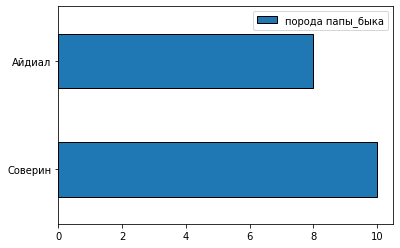

In [67]:
cow_buy['порода папы_быка'].value_counts().plot.barh(ec='black', legend=True);

*Порода быков Соверин больше,чем Айдал*

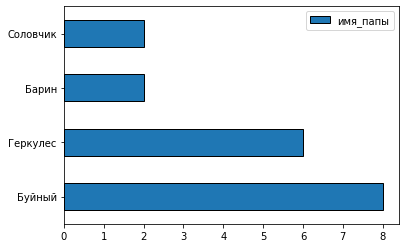

In [68]:
cow_buy['имя_папы'].value_counts().plot.barh(ec='black', legend=True);

*Имя быка Буйный встречается чаще всего*

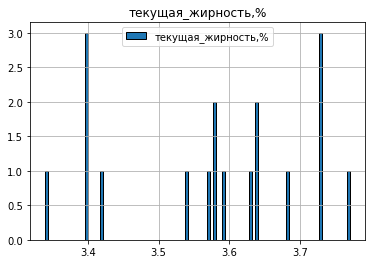

In [69]:
cow_buy.hist('текущая_жирность,%',bins = 100,ec='black', legend=True);

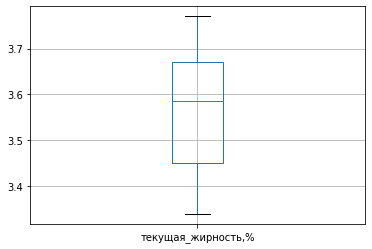

In [70]:
cow_buy.boxplot(column='текущая_жирность,%');

По гистограмме и коробке с усами видим, что  в столбце текущая_жирность,% выбросов нет

In [71]:
cow_buy['текущая_жирность,%'].describe()

count    18.000000
mean      3.576111
std       0.133995
min       3.340000
25%       3.450000
50%       3.585000
75%       3.670000
max       3.770000
Name: текущая_жирность,%, dtype: float64

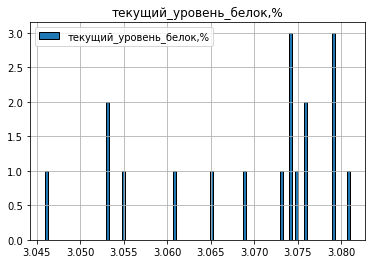

In [72]:
cow_buy.hist('текущий_уровень_белок,%',bins = 100,ec='black', legend=True);

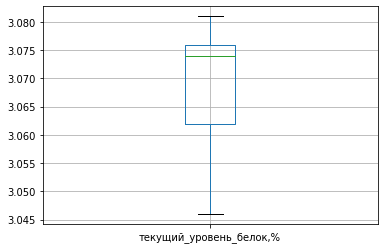

In [73]:
cow_buy.boxplot(column='текущий_уровень_белок,%');

По гистограмме и коробке с усами видим, что  в столбце текущий_уровень_белок,% выбросов нет

In [74]:
cow_buy['текущий_уровень_белок,%'].describe()

count    18.000000
mean      3.069000
std       0.010808
min       3.046000
25%       3.062000
50%       3.074000
75%       3.076000
max       3.081000
Name: текущий_уровень_белок,%, dtype: float64

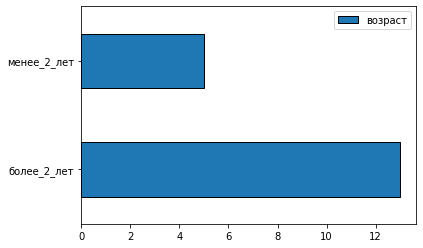

In [75]:
cow_buy['возраст'].value_counts().plot.barh(ec='black', legend=True);

Больше коров с возрастом более 2х лет

**Вывод**
- Количество пастбищ разных типов - поровну
- количество быков разных пород - одинаковое
- По гистограмме и коробке с усами видим, что  в столбце текущий_уровень_белок,%;текущая_жирность,% выбросов нет
- Имя быка Буйный встречается чаще всего
- Порода быков Соверин больше,чем Айдал
- Больше коров с возрастом более 2х лет

Вывод по ferma_main

- Выброс удой, кг  - это максимальное значение и оно равно 45616. Это явный выброс, потому что корова не может производить столько молока, об этом говорит и медиана и среднее. Удаляем его
- По гистограмме и ящику с усами можно сказать, что выбросов  в эке (энергетическая кормовая единица), сырой протеин, г,спо (сахаро-протеиновое соотношение) не обнаружено
- Видим много выбросов в столбце жирность,%, но удалять их все не стоит
- Увидели выбросы в таблице белок,%
- Обычно молоко - вкусное
- Возраст у коров обычно более 2х лет

Вывод по ferma_dad

- Больше всего имелось быков с именем Барин

Вывод по cow_buy

- Количество пастбищ разных типов - поровну
- количество быков разных пород - одинаковое
- По гистограмме и коробке с усами видим, что  в столбце текущий_уровень_белок,%;текущая_жирность,% выбросов нет
- Имя быка Буйный встречается чаще всего
- Порода быков Соверин больше,чем Айдал
- Больше коров с возрастом более 2х лет

## Корреляционный анализ ferma_main.csv

1. Изучите взаимосвязь между признаками: рассчитайте коэффициенты корреляции между всеми признаками.

2. Постройте диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков. Пример: диаграмма рассеяния для Удой, кг и Сырой протеин, г, цвет точек диаграммы отображает признак Порода. Учитывайте, что виды связи в подгруппах могут различаться — например, для разных пород.

3. Сделайте выводы о взаимосвязи признаков.
- Какой тип взаимосвязи между целевым и входными признаками?
- Есть ли нелинейные связи между целевым и входными признаками? Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?
- Наблюдается ли мультиколлинеарность между входными признаками?

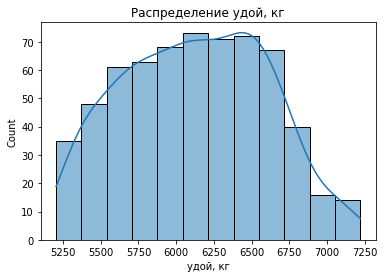

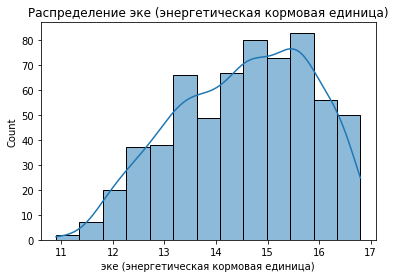

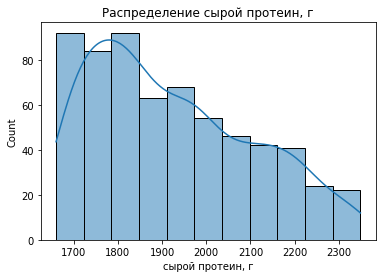

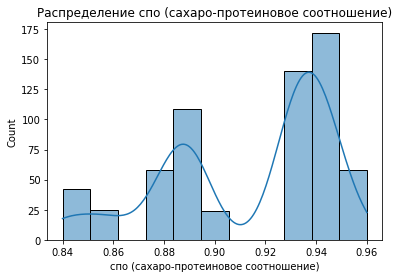

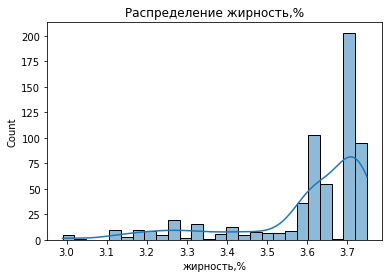

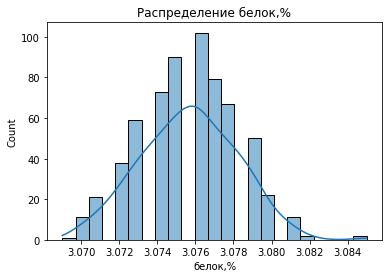

In [76]:
quantitative_features = ['удой, кг', 'эке (энергетическая кормовая единица)', 'сырой протеин, г',
                         'спо (сахаро-протеиновое соотношение)', 'жирность,%', 'белок,%']

# Построение гистограмм для всех количественных признаков
for feature in quantitative_features:
    sns.histplot(ferma_main[feature], kde=True)  # Use histplot with kde=True for a smooth curve
    plt.title('Распределение ' + feature)
    plt.show()

Корреляция Спирмена

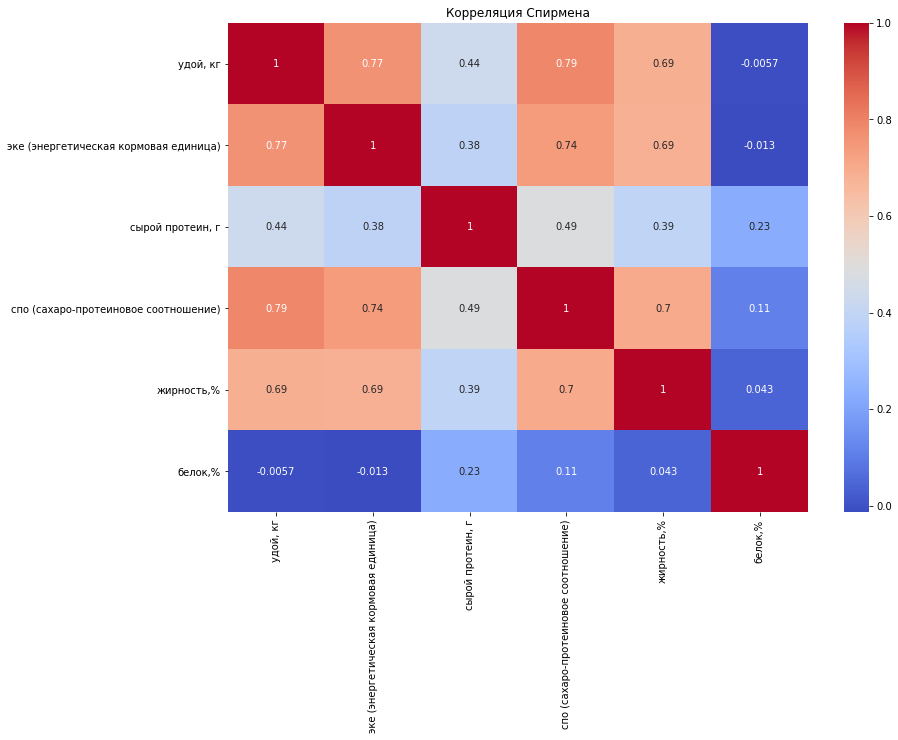

In [77]:
spearman_corr = ferma_main[quantitative_features].corr(method='spearman')
    
# Create and display heatmap
plt.figure(figsize=(13, 9))  # Set figure size
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')  # Use spearman_corr in the heatmap
plt.title('Корреляция Спирмена')  # Add a title
plt.show()

Значение	Интерпретация
от 0 до 0,3	очень слабая
от 0,3 до 0,5	слабая
от 0, 5 до 0,7	средняя
от 0,7 до 0, 9	высокая
от 0,9 до 1	очень высокая

Высокую корреляцию можно наблюдать:
- с удой:
    - эке (энергетическая кормовая единица) = 0.763213
    - спо (сахаро-протеиновое соотношение) = 0.805056
- эке (энергетическая кормовая единица):
     - с спо (сахаро-протеиновое соотношение) = 0.749056

**Посмотрим на диаграмму рассеивания удой и эке (энергетическая кормовая единица)** (высокая корреляция)

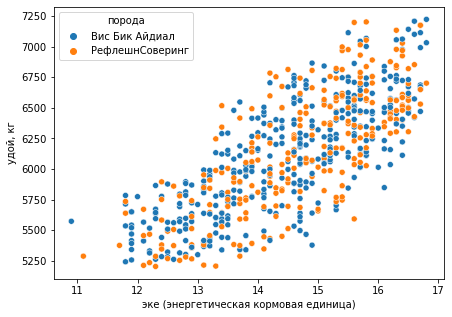

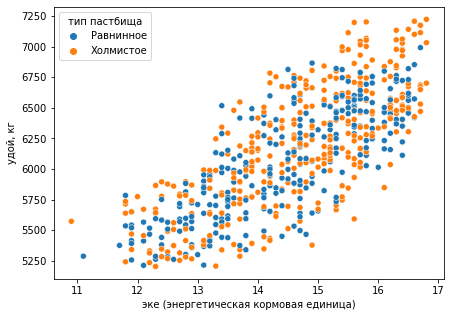

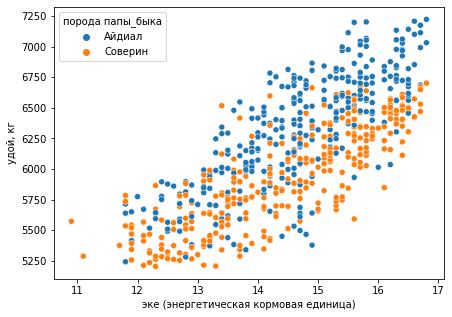

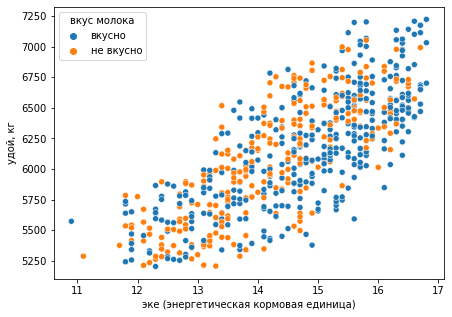

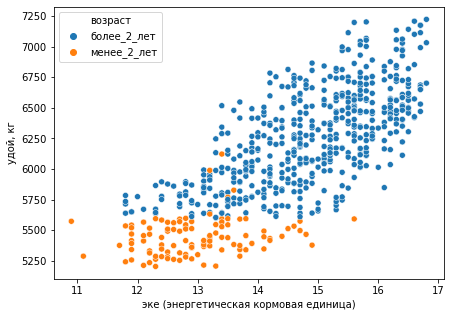

In [78]:
hue1 = ['порода','тип пастбища','порода папы_быка','вкус молока','возраст'] 
for i in hue1:
    fig, scatter = plt.subplots(figsize = (7,5))
    scatter = sns.scatterplot( y='удой, кг', x='эке (энергетическая кормовая единица)', data=ferma_main, hue=i);

*Видим, что данные распределеяются линейно. Есть линейная зависимость. Так же возрастраспределяется слева менее2х лет, справа более*

**Посмотрим на диаграмму рассеивания удой и сырой протеин, г**

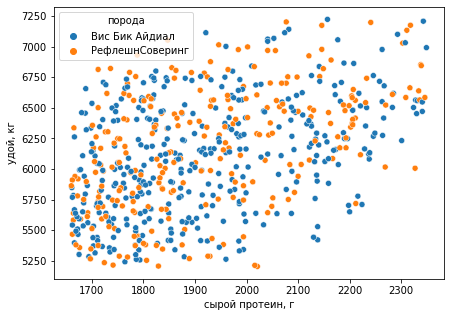

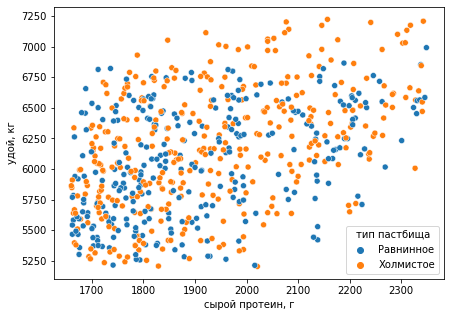

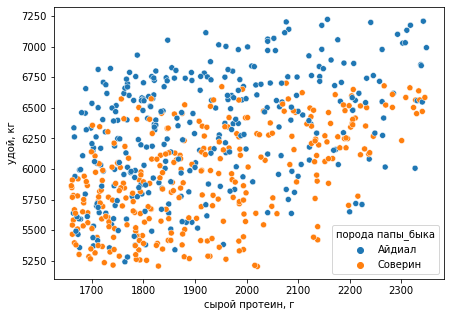

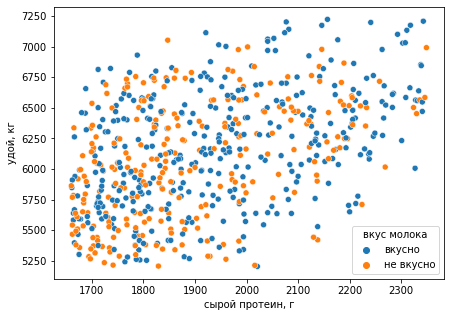

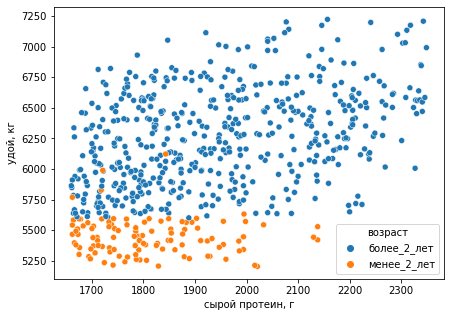

In [79]:
for i in hue1:
    fig, scatter = plt.subplots(figsize = (7,5))
    scatter = sns.scatterplot(y='удой, кг', x='сырой протеин, г', data=ferma_main, hue=i);

Зависимость есть. Видно, что возраст распределяется с удой слева менее 2х лет, справа более

**Посмотрим на диаграмму рассеивания удой и спо (сахаро-протеиновое соотношение)**(Высокая корреляция)

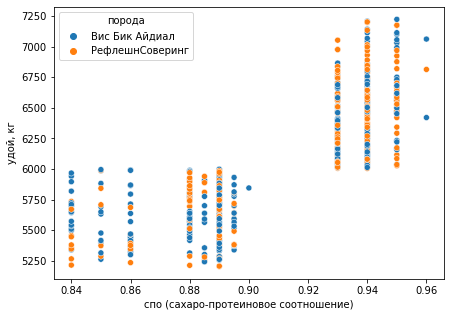

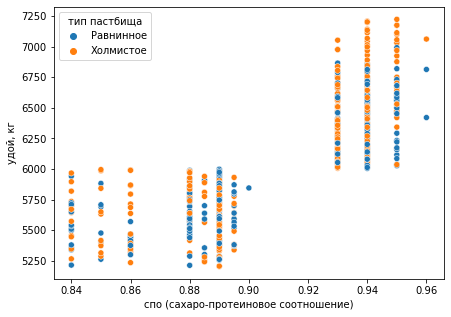

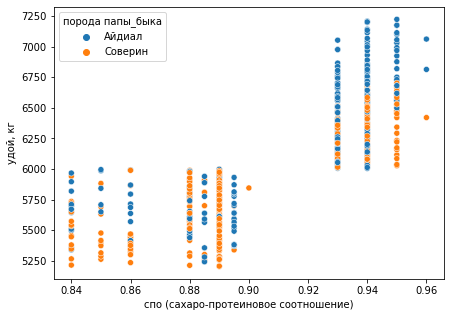

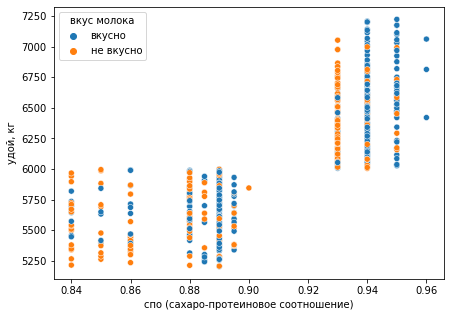

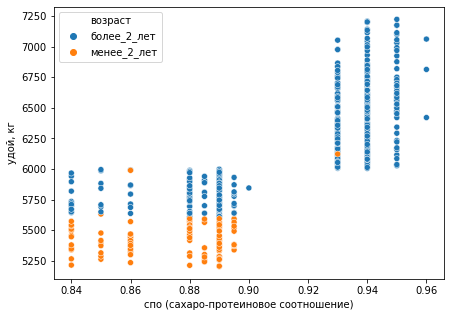

In [80]:
for i in hue1:
    fig, scatter = plt.subplots(figsize = (7,5))
    scatter = sns.scatterplot(y='удой, кг', x='спо (сахаро-протеиновое соотношение)', data=ferma_main, hue=i);

Чем больше СПО, тем больше удой. Связаны нелиейно. На последней диаграмме видно, что возраст распределяется снизу менее 2х лет сверху более

**Посмотрим на диаграмму рассеивания удой и жирность,%**

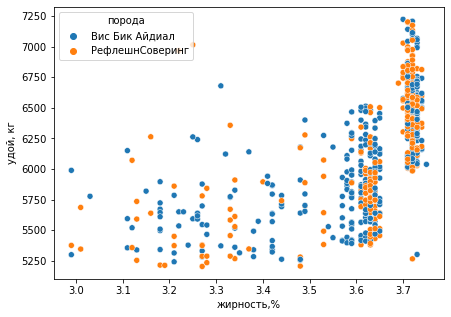

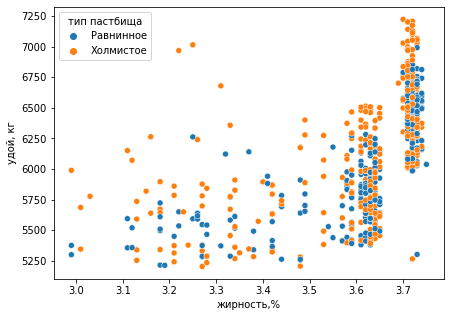

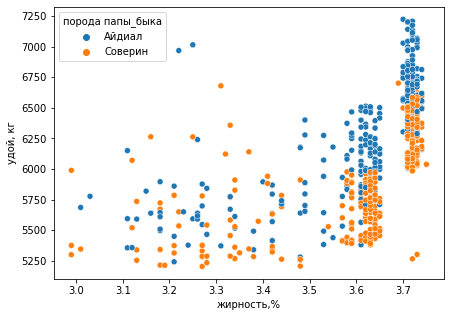

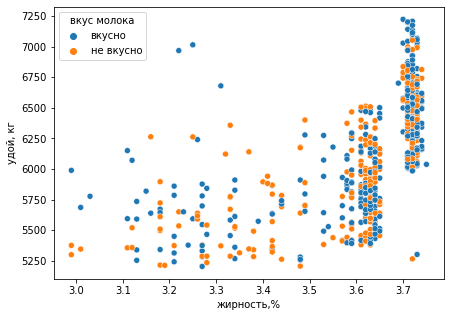

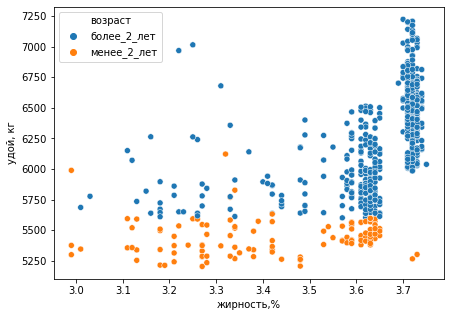

In [81]:
for i in hue1:
    fig, scatter = plt.subplots(figsize = (7,5))
    scatter = sns.scatterplot(y='удой, кг', x='жирность,%', data=ferma_main, hue=i);

Так данных по жирности продута больше начиная с 3.5, можно заметить, что начинается зависимость чем больше жирность, тем больше  удой. Связаны нелинейно

**Посмотрим на диаграмму рассеивания удой и белок,%**

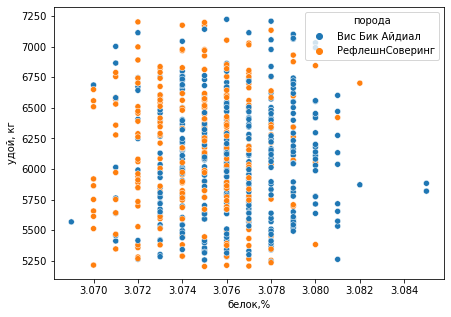

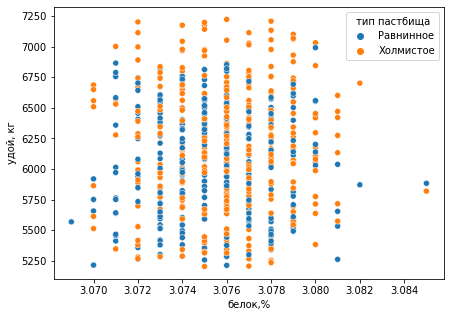

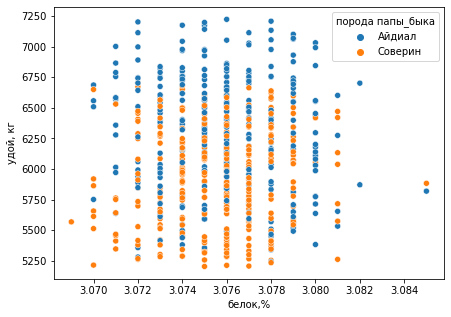

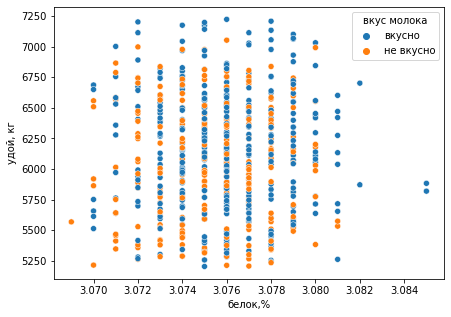

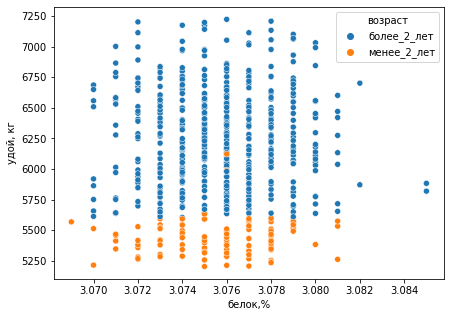

In [82]:
for i in hue1:
    fig, scatter = plt.subplots(figsize = (7,5))
    scatter = sns.scatterplot(y='удой, кг', x='белок,%', data=ferma_main, hue=i);

Видно, что удой не зависит от количества 

**Вывод:**
- Какой тип взаимосвязи между целевым и входными признаками?
    - Наблюдается линейная зависимость, исключением являются белок,сырой протеин,жирность,СПО
- Есть ли нелинейные связи между целевым и входными признаками? Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?
    - Да, есть - связь удоя с белоком и сырым протеином. Если связывать удой с белоком и сырым протеином то  в основном они зависят от корма, следовательно надо добавить пищу 
- Наблюдается ли мультиколлинеарность между входными признаками?
    - Как правило, о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю.Мультиколлинеарности не наблюдается, потому что  эке (энергетическая кормовая единица) с спо (сахаро-протеиновое соотношение) = 0.749056

## Обучение модели линейной регрессии

### Первая модель

1. 
Вам предстоит обучить три модели простой линейной регрессии.
- Подготовьте данные датасета ferma_main.csv и обучите на них первую модель LinearRegression.
- Используйте в качестве целевого признак Удой, кг.
- Отберите признаки, которые подходят для модели линейной регрессии, аргументируйте выбор. Опирайтесь не только на наличие или отсутствие линейной связи между признаками, но и на причинно-следственные связи между удоем коров и группами признаков из описания датасета.
- Разбейте данные на тренировочную и тестовую выборки.
- Кодируйте категориальные признаки с помощью OneHotEncoder.
- Масштабируйте количественные признаки с помощью StandardScaler.
- Обучите модель линейной регрессии на подготовленных данных.
- Оцените качество модели на тестовой выборке: рассчитайте R², проанализируйте остатки с помощью графиков.

Оформите выводы, укажите:

- значение R² модели;
- какие выводы следуют из анализа остатков;
- нужны ли дополнительные исследования.



In [83]:
ferma_main.head(0)

,id,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст


УДОЙ - количество молока, получаемое от сельскохозяйственных животных. Не зависит от вкуса,от белка и от жирности - эти два связаны в основном кормом

Заметка: *При пастбищном содержании среднесуточный удой коров был на 10–19 % выше, чем при стойловом содержании, и составил 21–28 кг молока на 1 голову.*

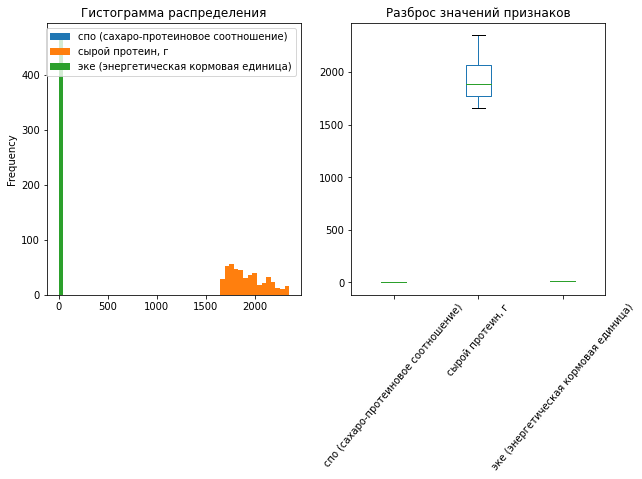

In [84]:
RANDOM_STATE = 42
# сохранение выборок
X = ferma_main.drop(['удой, кг','вкус молока','жирность,%','белок,%'], axis=1)
y = ferma_main['удой, кг']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.25,
    random_state=RANDOM_STATE)
# список всех категориальных признаков из тренировочной выборки
cat_col_names = ['порода','тип пастбища','порода папы_быка','возраст']
# список всех количественных признаков из тренировочной выборки
num_col_names = ['спо (сахаро-протеиновое соотношение)','сырой протеин, г','эке (энергетическая кормовая единица)']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
X_train[num_col_names].plot(kind='hist', bins=50, ax=axes[0])
axes[0].set_title('Гистограмма распределения')

X_train[num_col_names].plot(kind='box', ax=axes[1], rot=50)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [85]:
# масштабируем категориальных
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
# масштабируем количественные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

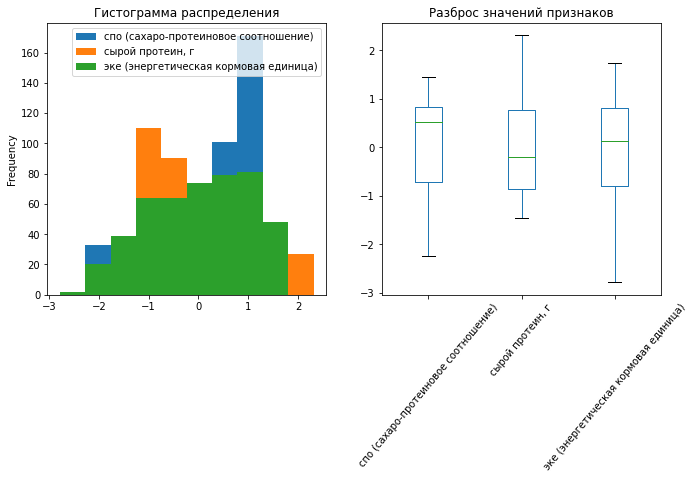

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=50)
axes[1].set_title('Разброс значений признаков')
plt.show()

Больше всего значений находятся на промежутке от [-1,1], но есть и заметные выбросы. На общем фоне выбивается жирность

In [87]:
# модель линейной регрессии
model_lr  = LinearRegression()

# обучим модель на тренировочных данных
model_lr.fit(X_train,y_train)

# получим предсказания модели на тестовых данных 
# сохраним результат в переменную predictions
predictions1 = model_lr.predict(X_test)

# посчитаем среднюю коэфициент детерминации на тестовых данных и выведите её на экран
r2_1 = r2_score(y_test,predictions1)
r2_1

0.7844078173416966

Коэфициент детерминации неплохой, посмотрим на остатки

In [88]:
for feature_number, feature_name in enumerate(X_train.columns):
    weight = model_lr.coef_[feature_number]
    print(f"{feature_name:<20}: {weight:+.6f}") 

x0_РефлешнСоверинг  : -1.006906
x1_Холмистое        : +50.992039
x2_Соверин          : -240.316969
x3_менее_2_лет      : -237.101221
спо (сахаро-протеиновое соотношение): +162.478018
сырой протеин, г    : +50.601347
эке (энергетическая кормовая единица): +156.863493


Больше всего значений находятся на промежутке от [-1,1], но есть и заметные выбросы. На общем фоне выбивается жирность
Коэфициент детерминации = 0.831173674692245

### Анализ остатков 1 

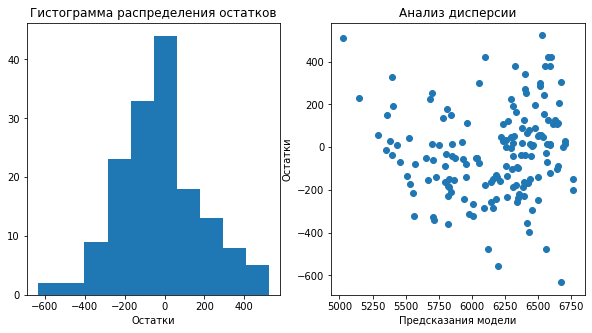

In [89]:
# проведите анализ остатков
# перед этим рассчитайте остатки
residuals = y_test - predictions1

# постройте графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x = residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = predictions1, y = residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

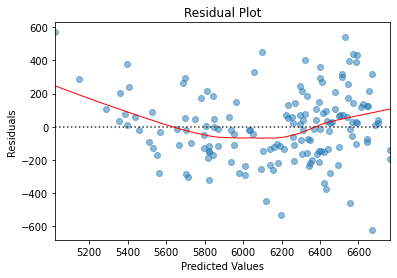

In [90]:
sns.residplot(x=predictions1, y=y_test, data=None, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

- Постоянный разброс дисперсии ( остатки модели независимы на всём диапазоне использования модели, её разброс постоянный.)
- Нормальное распределение (Сумма остатков прогнозной модели близка к нулю — модель хорошо работает)

**Вывод:**
- Больше всего значений находятся на промежутке от [-200,200], но есть и заметные выбросы. На общем фоне выбивается жирность
- значение R² модели = 0.831 - неплохое значение для модели
- Из анализа остатков:
   - Постоянный разброс дисперсии ( остатки модели независимы на всём диапазоне использования модели, её разброс постоянный.)
   - Нормальное распределение (Сумма остатков прогнозной модели близка к нулю — модель хорошо работает) 
- нужны ли дополнительные исследования.
    - Расширить датасет. Например у нас есть только молоко с высокой жирностью
    - Добавить новые признаки.

### Вторая модель

2. Подготовьте данные с учётом связи входных признаков с целевым и обучите на них вторую модель LinearRegression.
- Посмотрите на диаграммы рассеяния: на них можно увидеть, что некоторые входные признаки связаны с целевым нелинейно. Исключите нелинейность, чтобы эти признаки были информативны для линейной регрессии. Вот несколько способов, которыми это можно сделать:
 - Вы обнаружите, что СПО и Удой связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение СПО, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуйте СПО в категориальный бинарный признак, использовав эту границу.
- Вы обнаружите, что ЭКЕ и Удой также связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак ЭКЕ в квадрате.
- Повторите шаги из пункта 1 и создайте вторую модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.


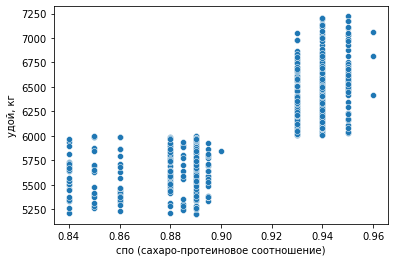

In [91]:
sns.scatterplot(y='удой, кг', x='спо (сахаро-протеиновое соотношение)', data=ferma_main);
plt.show()

Видим, что есть граница - 0.92. Если >0.92 то 1, если меньше то 0. Преобразуем СПО в категориальный бинарный признак, использовав эту границу.

In [92]:
ferma_main['спо_cat'] = pd.cut(ferma_main[
    'спо (сахаро-протеиновое соотношение)'], bins=[-np.inf, 0.92, np.inf], labels=[0, 1])
ferma_main['спо_cat'].head()

0    0
1    0
2    0
3    0
4    0
Name: спо_cat, dtype: category
Categories (2, int64): [0 < 1]

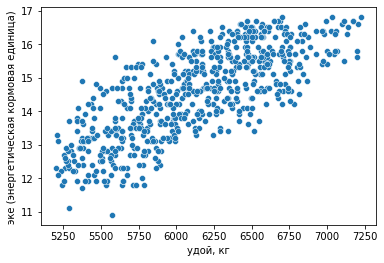

In [93]:
sns.scatterplot(x='удой, кг', y='эке (энергетическая кормовая единица)', data=ferma_main);
plt.show()

Введем новый признак ЭКЕ в квадрате.

In [94]:
ferma_main['эке_2'] = ferma_main['эке (энергетическая кормовая единица)'] ** 2
ferma_main['эке_2'].head()


0    201.64
1    163.84
2    196.00
3    153.76
4    163.84
Name: эке_2, dtype: float64

Посмотрим на корреляцию с новыми признаками

In [95]:
ferma_main.corr()

,id,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%",эке_2
id,1.000000,-0.006816,-0.028600,-0.035613,-0.064803,0.017126,0.002547,-0.027738
"удой, кг",-0.006816,1.000000,0.765098,0.446731,0.806339,0.600902,0.002966,0.765530
эке (энергетическая кормовая единица),-0.028600,0.765098,1.000000,0.387875,0.749007,0.637279,-0.008939,0.998868
"сырой протеин, г",-0.035613,0.446731,0.387875,1.000000,0.446332,0.357793,0.226802,0.392877
спо (сахаро-протеиновое соотношение),-0.064803,0.806339,0.749007,0.446332,1.000000,0.629098,0.073718,0.745499
"жирность,%",0.017126,0.600902,0.637279,0.357793,0.629098,1.000000,-0.026542,0.628598
"белок,%",0.002547,0.002966,-0.008939,0.226802,0.073718,-0.026542,1.000000,-0.007971
эке_2,-0.027738,0.765530,0.998868,0.392877,0.745499,0.628598,-0.007971,1.000000


In [96]:
RANDOM_STATE = 42
# сохранение выборок
X = ferma_main.drop(['удой, кг','вкус молока','эке (энергетическая кормовая единица)',
                     'спо (сахаро-протеиновое соотношение)','жирность,%','белок,%'], axis=1)
y = ferma_main['удой, кг']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.25,
    random_state=RANDOM_STATE)

In [97]:
# список всех категориальных признаков из тренировочной выборки
cat_col_names = ['спо_cat','порода','тип пастбища','порода папы_быка','возраст']
X_train[cat_col_names].nunique()

спо_cat             2
порода              2
тип пастбища        2
порода папы_быка    2
возраст             2
dtype: int64

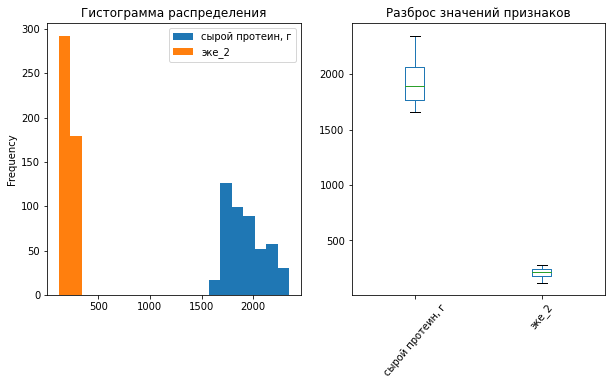

In [98]:
# список всех количественных признаков из тренировочной выборки
num_col_names = ['сырой протеин, г','эке_2']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
X_train[num_col_names].plot(kind='hist', bins=20, ax=axes[0])
axes[0].set_title('Гистограмма распределения')

X_train[num_col_names].plot(kind='box', ax=axes[1], rot=50)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [99]:
# масштабируем категориальных
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

In [100]:
# масштабируем количественные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

In [101]:
## подготовка признаков (масштабирование и кодирование)
encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

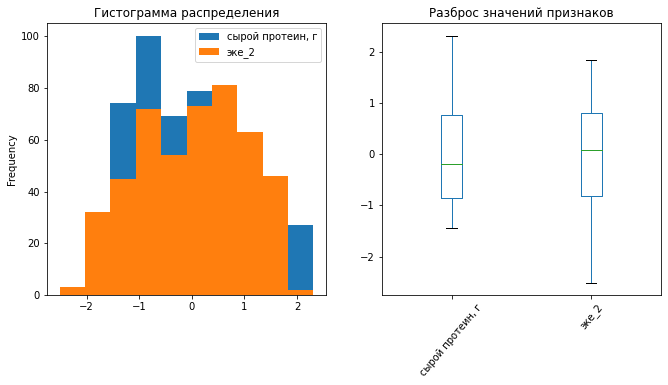

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=50)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [103]:
# модель линейной регрессии
model_lr2  = LinearRegression()

# обучим модель на тренировочных данных
model_lr2.fit(X_train,y_train)

# получим предсказания модели на тестовых данных 
# сохраним результат в переменную predictions
predictions2 = model_lr2.predict(X_test)

# посчитаем среднюю коэфициент детерминации на тестовых данных и выведите её на экран
r2_2 = r2_score(y_test,predictions2)
r2_2

0.8180879926867504

Видим, что моедль стала лучше

In [104]:
for feature_number, feature_name in enumerate(X_train.columns):
    weight2 = model_lr2.coef_[feature_number]
    print(f"{feature_name:<20}: {weight2:+.6f}") 

x0_1                : +377.120436
x1_РефлешнСоверинг  : +4.399432
x2_Холмистое        : +32.637849
x3_Соверин          : -211.463067
x4_менее_2_лет      : -224.709410
сырой протеин, г    : +49.131219
эке_2               : +154.179906


### Анализ остатков 2

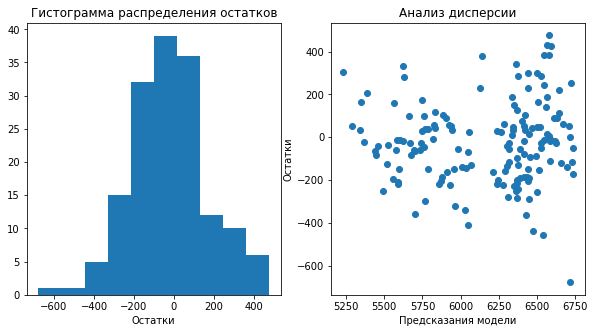

In [105]:
# проведите анализ остатков
# перед этим рассчитайте остатки
residuals = y_test - predictions2

# постройте графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x = residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = predictions2, y = residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Вывод:
- Больше всего значений находятся на промежутке от [-200,100], но есть и заметные выбросы.
- значение R² модели = 0.844 - неплохое значение для модели
- Из анализа остатков:
   - Постоянный разброс дисперсии ( остатки модели независимы на всём диапазоне использования модели, её разброс постоянный.)
   - Распределение смещено влево, это говорит о том, что модель занижает значения

### Третья модель

3. Добавьте в данные новый признак и обучите на них третью модель LinearRegression.
- Добавьте признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.
- Устраните нелинейность между признаками.
- Повторите шаги из пункта 1 и создайте третью модель: подготовьте данные, обучите модель, оцените её качество и напишите выводы.


In [106]:
ferma_main = ferma_main.merge(ferma_dad[['id', 'имя папы']], on='id')
ferma_main.head()

,id,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст,спо_cat,эке_2,имя папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


In [107]:
RANDOM_STATE = 42
# сохранение выборок
X = ferma_main.drop(['удой, кг','вкус молока','эке (энергетическая кормовая единица)',
                     'спо (сахаро-протеиновое соотношение)','жирность,%','белок,%'], axis=1)
y = ferma_main['удой, кг']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.25,
    random_state=RANDOM_STATE)

In [108]:
# список всех категориальных признаков из тренировочной выборки
cat_col_names = ['спо_cat','порода','тип пастбища','порода папы_быка','возраст','имя папы']
X_train[cat_col_names].nunique()

спо_cat             2
порода              2
тип пастбища        2
порода папы_быка    2
возраст             2
имя папы            4
dtype: int64

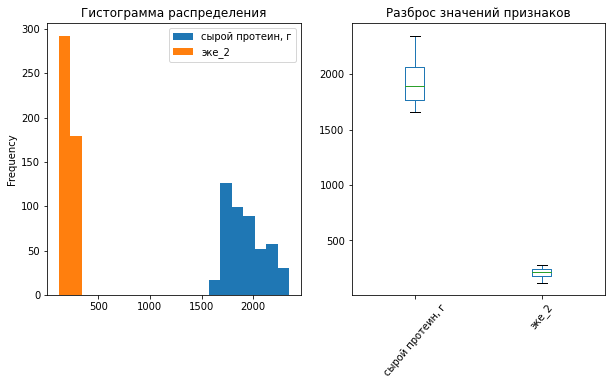

In [109]:
# список всех количественных признаков из тренировочной выборки
num_col_names = ['сырой протеин, г','эке_2']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
X_train[num_col_names].plot(kind='hist', bins=20, ax=axes[0])
axes[0].set_title('Гистограмма распределения')

X_train[num_col_names].plot(kind='box', ax=axes[1], rot=50)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [110]:
# масштабируем категориальных
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

In [111]:
# масштабируем количественные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

In [112]:
## подготовка признаков (масштабирование и кодирование)
encoder_col_names = encoder.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
encoder_col_names

array(['x0_1', 'x1_РефлешнСоверинг', 'x2_Холмистое', 'x3_Соверин',
       'x4_менее_2_лет', 'x5_Буйный', 'x5_Геркулес', 'x5_Соловчик'],
      dtype=object)

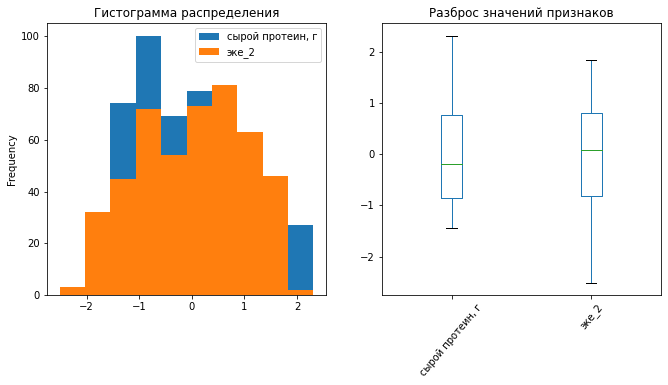

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=50)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [114]:
# модель линейной регрессии
model_lr3  = LinearRegression()

# обучим модель на тренировочных данных
model_lr3.fit(X_train,y_train)

# получим предсказания модели на тестовых данных 
# сохраним результат в переменную predictions
predictions3 = model_lr3.predict(X_test)

# посчитаем среднюю коэфициент детерминации на тестовых данных и выведите её на экран
r2_3 = r2_score(y_test,predictions3)
r2_3

0.8247542745210404

Модель стала гораздо лучше. Посмотрим на остатки

In [115]:
for feature_number, feature_name in enumerate(X_train.columns):
    weight3 = model_lr3.coef_[feature_number]
    print(f"{feature_name:<20}: {weight3:+.6f}") 

x0_1                : +353.779829
x1_РефлешнСоверинг  : +14.919634
x2_Холмистое        : +50.943310
x3_Соверин          : +44.033305
x4_менее_2_лет      : -192.548709
x5_Буйный           : +302.179596
x5_Геркулес         : +333.929151
x5_Соловчик         : +24.684409
сырой протеин, г    : +52.035317
эке_2               : +162.387792


### Анализ остатков 3

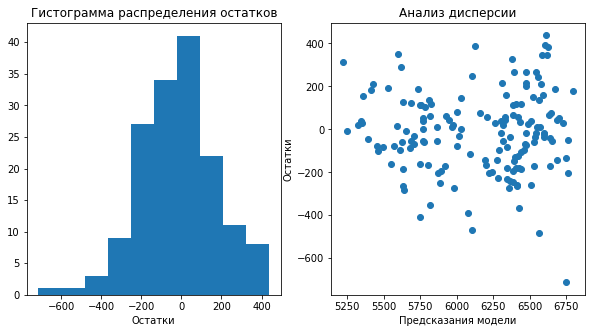

In [116]:
# проведите анализ остатков
# перед этим рассчитайте остатки
residuals = y_test - predictions3

# постройте графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x = residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = predictions3, y = residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

95% доверительный интервал для прогноза удоев: (5351.318280574307, 6749.077628641809)


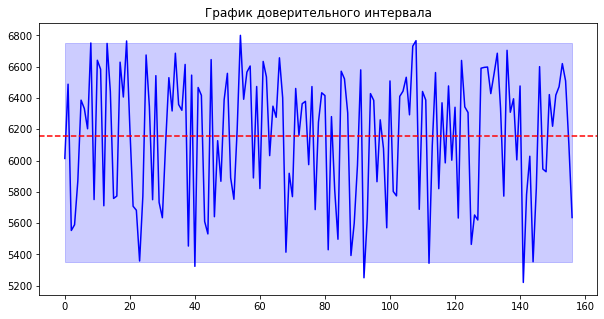

In [117]:
# Расчет стандартных ошибок
lower_bound = np.percentile(predictions3, 2.5)
upper_bound = np.percentile(predictions3, 97.5)

print(f'95% доверительный интервал для прогноза удоев: ({lower_bound}, {upper_bound})')

mean_predictions1 = np.mean(predictions3)

plt.figure(figsize=(10,5))
plt.plot(predictions3, color='blue')
plt.fill_between(range(len(predictions3)), lower_bound, upper_bound, color='blue', alpha=0.2)
plt.axhline(mean_predictions1, color='red', linestyle='--') # добавляем линию среднего значения
plt.title('График доверительного интервала')
plt.show()

Вывод:
- Больше всего значений находятся на промежутке от [-200,100], но есть и заметные выбросы.
- значение R² модели = 0.856 - неплохое значение для модели
- Из анализа остатков:
   - Постоянный разброс дисперсии ( остатки модели независимы на всём диапазоне использования модели, её разброс постоянный.)
   - Распределение смещено влево, это говорит о том, что модель занижает значения

### Сравните качество трёх моделей линейной регрессии, сопоставьте их R² и остатки.

Сопоставим R²

In [118]:
r2_1,r2_2,r2_3

(0.7844078173416966, 0.8180879926867504, 0.8247542745210404)

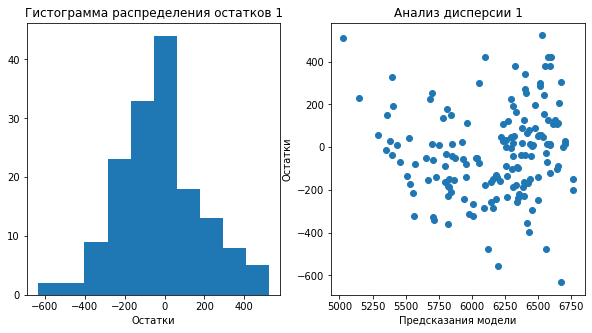

In [119]:
# проведите анализ остатков
# перед этим рассчитайте остатки
residuals = y_test - predictions1

# постройте графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x = residuals)
axes[0].set_title('Гистограмма распределения остатков 1')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = predictions1, y = residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии 1')
plt.show()

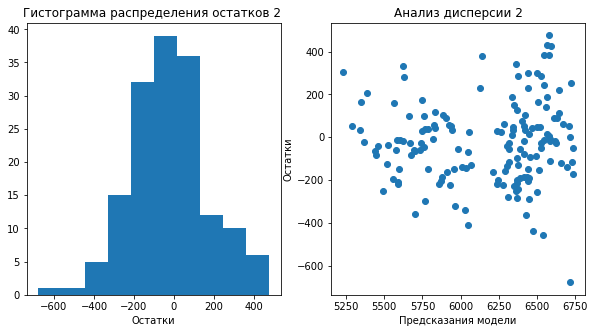

In [120]:
# проведите анализ остатков
# перед этим рассчитайте остатки
residuals = y_test - predictions2

# постройте графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x = residuals)
axes[0].set_title('Гистограмма распределения остатков 2 ')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = predictions2, y = residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии 2')
plt.show()

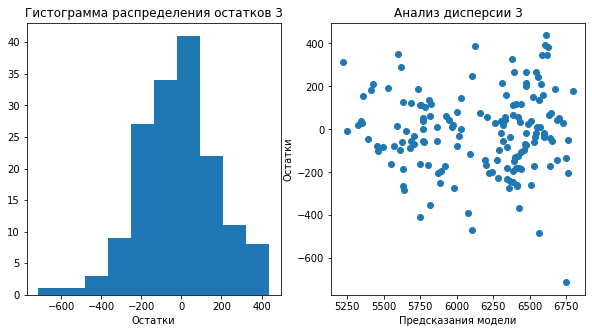

In [121]:
# проведите анализ остатков
# перед этим рассчитайте остатки
residuals = y_test - predictions3

# постройте графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(x = residuals)
axes[0].set_title('Гистограмма распределения остатков 3')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x = predictions3, y = residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии 3')
plt.show()

Сравним остатки

1. Первая модель

- Больше всего значений находятся на промежутке от [-200,200], но есть и заметные выбросы. 
- значение R² модели = 0.784 - неплохое значение для модели
- Из анализа остатков:
   - Постоянный разброс дисперсии ( остатки модели независимы на всём диапазоне использования модели, её разброс постоянный.)
   - Нормальное распределение (Сумма остатков прогнозной модели близка к нулю — модель хорошо работает) 
2. Вторая модель

- Больше всего значений находятся на промежутке от [-200,200], но есть и заметные выбросы.
- значение R² модели = 0.818 - неплохое значение для модели
- Из анализа остатков:
   - Постоянный разброс дисперсии ( остатки модели независимы на всём диапазоне использования модели, её разброс постоянный.)
   - Нормальное распределение (Сумма остатков прогнозной модели близка к нулю — модель хорошо работает) 
3. Третья модель

- Больше всего значений находятся на промежутке от [-200,200], но есть и заметные выбросы.
- значение R² модели = 0.824 - неплохое значение для модели
- Из анализа остатков:
   - Постоянный разброс дисперсии ( остатки модели независимы на всём диапазоне использования модели, её разброс постоянный.)
   - Нормальное распределение (Сумма остатков прогнозной модели близка к нулю — модель хорошо работает) 
   
Мы видим, что растет значение R², но при этом больше значений левее, это говорит о том, что у модели больше заниженных значений

### Оцените качество каждой модели по трём метрикам: MSE, MAE, RMSE. Используйте функции для расчёта метрик.
- Выберите лучшую модель;
- Укажите доверительный интервал прогноза лучшей модели. Для этого рассчитайте квантили ошибки модели на тренировочных данных.


In [122]:
y_pred = [predictions1,predictions2,predictions3]
k=1
for i in y_pred:
    mse = mean_squared_error(y_test, i, squared=False) 
    rmse = mean_squared_error(y_test, i, squared=False) 
    mae = mean_absolute_error(y_test,i)
    print( 'для модели', k)
    print('mse:', mse, 'mae:', mae, 'rmse:', rmse)
    k+=1

для модели 1
mse: 209.49227911706083 mae: 164.24194463474927 rmse: 209.49227911706083
для модели 2
mse: 192.43417396901447 mae: 149.03965222364596 rmse: 192.43417396901447
для модели 3
mse: 188.8753289505593 mae: 146.16302445362322 rmse: 188.8753289505593


95% доверительный интервал прогноза: (-402.9079308679507, 420.1994183602995) = 823.1073492282502
95% доверительный интервал прогноза: (-366.7256395800552, 382.55387804812113) = 749.2795176281763
95% доверительный интервал прогноза: (-393.099637079012, 355.9371511941207) = 749.0367882731327


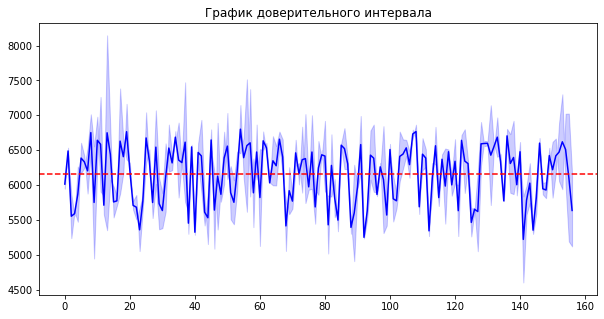

In [123]:
y_pred = [predictions1,predictions2,predictions3]
for i in y_pred:
    # Рассчитаем ошибку модели
    standard_errors = y_test - i

    # Рассчитаем квантили ошибки
    lower_quantile = np.percentile(standard_errors, 2.5)
    upper_quantile = np.percentile(standard_errors, 97.5)

    # Распечатаем доверительный интервал
    print(f'95% доверительный интервал прогноза: ({lower_quantile}, {upper_quantile}) = {upper_quantile-lower_quantile}')

lower_bound = predictions3 - 1.96 * standard_errors
upper_bound = predictions3 + 1.96 * standard_errors

mean_predictions1 = np.mean(predictions3)

plt.figure(figsize=(10,5))
plt.plot(predictions3, color='blue')
plt.fill_between(range(len(predictions3)), lower_bound, upper_bound, color='blue', alpha=0.2)
plt.axhline(mean_predictions1, color='red', linestyle='--') # добавляем линию среднего значения
plt.title('График доверительного интервала')
plt.show()

Вывод:
- Коэфициент детерминации лучше всего у третей модели 
- У всех моделей нормальный разброс дисперсии
- У всех моделей примерно одинаковое нормальные распределение
- Меньше всего MSE, MAE, RMSE у последней модели
- доверительный интервал самый лучший у последней модели

Выбираем 3ю модель

### С помощью лучшей модели спрогнозируйте удой коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.
- Добавьте недостающие признаки ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): возьмите из датасета ferma_main.csv средние значения каждого из признаков и увеличьте их на 5%.
- Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
- Получите прогноз удоя коров.

In [124]:
cow_buy1 = cow_buy.copy()
cow_buy1['спо (сахаро-протеиновое соотношение)'] =  ferma_main['спо (сахаро-протеиновое соотношение)'].mean() * 1.05
cow_buy1['спо_cat'] = pd.cut(cow_buy1[
    'спо (сахаро-протеиновое соотношение)'], bins=[-np.inf, 0.92, np.inf], labels=[0, 1])
cow_buy1['сырой протеин, г'] =  ferma_main['сырой протеин, г'].mean() * 1.05
cow_buy1['эке (энергетическая кормовая единица)'] =  ferma_main['эке (энергетическая кормовая единица)'].mean() * 1.05
cow_buy1['эке_2'] =  cow_buy1['эке (энергетическая кормовая единица)']**2

cow_buy1['тип пастбища'] = cow_buy['тип пастбища'].str.capitalize()
cow_buy1 = cow_buy1.rename(columns={'текущая_жирность,%': 'жирность,%',
                                  'текущий_уровень_белок,%':'белок,%',
                                  'имя_папы':'имя папы'})
cow_buy1 = cow_buy1.drop(columns = ['спо (сахаро-протеиновое соотношение)',
                                    'эке (энергетическая кормовая единица)','жирность,%','белок,%'])

cow_buy1

,порода,тип пастбища,порода папы_быка,имя папы,возраст,спо_cat,"сырой протеин, г",эке_2
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,более_2_лет,1,2019.947532,233.361138
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,менее_2_лет,1,2019.947532,233.361138
2,РефлешнСоверинг,Равнинное,Соверин,Барин,более_2_лет,1,2019.947532,233.361138
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,более_2_лет,1,2019.947532,233.361138
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,более_2_лет,1,2019.947532,233.361138
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,менее_2_лет,1,2019.947532,233.361138
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,более_2_лет,1,2019.947532,233.361138
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,более_2_лет,1,2019.947532,233.361138
8,РефлешнСоверинг,Холмистое,Айдиал,Буйный,менее_2_лет,1,2019.947532,233.361138
9,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,более_2_лет,1,2019.947532,233.361138


In [125]:
# список всех категориальных признаков из тренировочной выборки
cat_col_names = ['спо_cat','порода','тип пастбища','порода папы_быка','возраст','имя папы']
num_col_names = ['сырой протеин, г','эке_2']

# Загрузка обученных скалеров и энкодеров и модели
dump(scaler, 'scaler.pkl')
dump(encoder, 'encoder.pkl')
dump(model_lr3, 'model_lr3.pkl')

scaler = load('scaler.pkl')
encoder = load('encoder.pkl')
best_model = load('model_lr3.pkl')

# Масштабирование количественных признаков
cow_buy1[num_col_names] = scaler.transform(cow_buy1[num_col_names])

# Кодирование категориальных признаков
cow_buy_encoded = encoder.transform(cow_buy1[cat_col_names])
cow_buy_encoded_df = pd.DataFrame(cow_buy_encoded, columns=encoder.get_feature_names(cat_col_names))

# Объединение масштабированных числовых колонок и закодированных категориальных колонок
#cow_buy_prepared = pd.concat([cow_buy1[num_col_names], cow_buy_encoded_df], axis=1)
cow_buy_prepared = pd.concat([cow_buy_encoded_df, cow_buy1[num_col_names]], axis=1)
# Прогнозирование с помощью обученной модели
predictions = best_model.predict(cow_buy_prepared)

# Вывод прогнозов
print('Прогнозы:', predictions)
#cow_buy_prepared

Прогнозы: [6609.91929681 6378.71102836 6283.99977532 6593.08937654 6542.14606633
 6425.38021759 6609.91929681 6571.25973712 6400.54066779 6344.70785976
 6617.92892634 6609.91929681 6127.4747423  6593.08937654 6344.70785976
 6425.38021759 6571.25973712 6542.14606633]


## Обучение модели логистической регрессии

### Подготовьте данные датасета ferma_main.csv и обучите на них модель LogisticRegression.
- Используйте в качестве целевого признак Вкус молока.
- При необходимости преобразуйте имеющиеся или добавьте новые признаки.
- Разбейте данные на тренировочную и тестовую выборки.
- Кодируйте категориальные признаки с помощью OneHotEncoder.
- Масштабируйте количественные признаки с помощью StandardScaler.
- Обучите модель логистической регрессии на подготовленных данных.
- Оцените качество модели на тестовой выборке: рассчитайте метрики accuracy, recall, precision.
- Постройте матрицу ошибок.
- Проанализируйте модель логистической регрессии.


In [126]:
ferma_main.head()

,id,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст,спо_cat,эке_2,имя папы
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


In [127]:
ferma_main['вкус молока'] = ferma_main['вкус молока'].replace({'вкусно': 1, 'не вкусно': 0})
RANDOM_STATE = 42
# сохранение выборок
X = ferma_main.drop(['вкус молока','эке (энергетическая кормовая единица)','спо (сахаро-протеиновое соотношение)'], axis=1)
y = ferma_main['вкус молока']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.25,
    random_state=RANDOM_STATE)

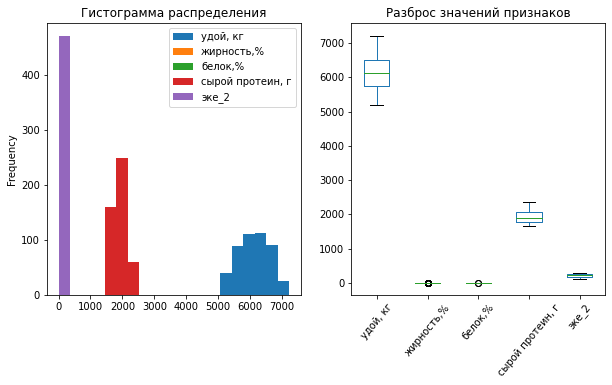

In [128]:
# список всех категориальных признаков из тренировочной выборки
cat_col_names = ['спо_cat','порода','тип пастбища','порода папы_быка','возраст','имя папы']
X_train[cat_col_names].nunique()
# список всех количественных признаков из тренировочной выборки
num_col_names = ['удой, кг','жирность,%','белок,%','сырой протеин, г','эке_2']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
X_train[num_col_names].plot(kind='hist', bins=20, ax=axes[0])
axes[0].set_title('Гистограмма распределения')

X_train[num_col_names].plot(kind='box', ax=axes[1], rot=50)
axes[1].set_title('Разброс значений признаков')
plt.show()


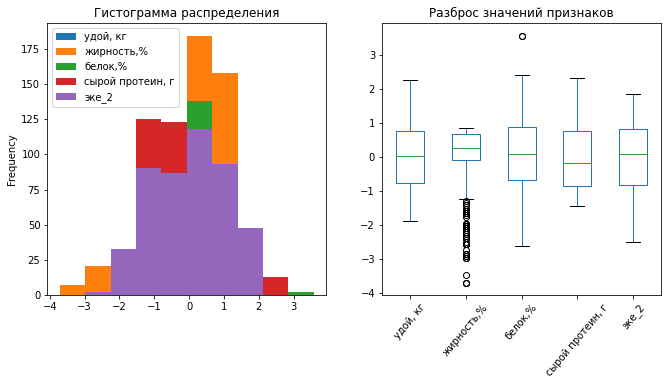

In [129]:
# масштабируем категориальных
encoder1 = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder1.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder1.transform(X_test[cat_col_names])

# масштабируем количественные
scaler1 = StandardScaler()
X_train_scaled = scaler1.fit_transform(X_train[num_col_names])
X_test_scaled = scaler1.transform(X_test[num_col_names])

## подготовка признаков (масштабирование и кодирование)
encoder_col_names = encoder1.get_feature_names()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=50)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [130]:
# модель линейной регрессии
model_lr4  = LogisticRegression()

# обучим модель на тренировочных данных
model_lr4.fit(X_train,y_train)

# получим предсказания модели на тестовых данных 
# сохраним результат в переменную predictions
predictions1 = model_lr4.predict(X_test)
predictions1

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0])

In [131]:
# Расчет точности модели
accuracy_metric = accuracy_score(y_test, predictions1)
print('Accuracy:', accuracy_metric)

precision_metric = precision_score(y_test, predictions1)
print("Precision: ", precision_metric)

recall_metric = recall_score(y_test, predictions1)
print("Recall: ", recall_metric)

Accuracy: 0.6242038216560509
Precision:  0.6178861788617886
Recall:  0.8636363636363636


"Accuracy" (точность) это доля правильно предсказанных наблюдений от общего количества наблюдений. В данном случае, модель правильно предсказала результаты с точностью 69.03%.

"Precision" (точность) это доля истинно положительных наблюдений от общего количества наблюдений, которые модель предсказала как положительные. В данном случае, из всех наблюдений, которые модель предсказала как 'вкусно', 70.80% действительно были 'вкусными'.

"Recall" (полнота) это доля истинно положительных наблюдений от общего количества истинных положительных наблюдений. В данном случае, модель идентифицировала 84.21% из всех реальных 'вкусных' наблюдений.

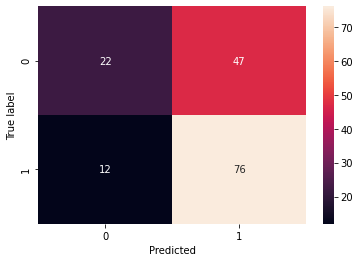

In [132]:
cm = confusion_matrix(y_test,predictions1)
sns.heatmap(cm,annot = True,fmt = 'd')
plt.ylabel('True label')
plt.xlabel('Predicted');

- 80 - это количество истинно отрицательных предсказаний. 
- 27 - это количество истинноположительных предсказаний. 


- 15 - это количество ложноположительных предсказаний. 
- 33 - это количество ложноотрицательных предсказаний. 


###  Объясните, какая ошибка критичнее всего при покупке коров: первого или второго рода. 


**Помните, что главное для заказчика — вкусное молоко. Сформулируйте ответ с учётом метрик recall и precision, выберите более важную из них.**

При покупке коров для получения вкусного молока критичнее всего ошибка первого рода, то есть когда модель неверно предсказывает, что молоко "вкусно", хотя на самом деле оно "не вкусно". Это означает, что мы можем купить корову, которая на самом деле производит не вкусное молоко, что приведет к неудовлетворенности заказчика.

Precision показывает, сколько из всех 'вкусных' наблюдений, предсказанных моделью, действительно являются 'вкусными'. Если значение precision близко к 1, это означает, что модель хорошо определяет коров, дающих вкусное молоко, и ошибок первого рода меньше.

**Сведите критичную ошибку к нулю: для этого измените порог принадлежности к классам. Ещё раз рассчитайте значения метрик recall и precision. Какое значение порога вы выбрали? Как изменились значения метрик?**

In [133]:
# Получение вероятностей принадлежности к положительному классу
predictions_prob = model_lr4.predict_proba(X_test)[:, 1]

threshold = 0.6  # Задайте значение порога
predict = [1 if prob >= threshold else 0 for prob in predictions_prob]

recall = recall_score(y_test, predict)
precision = precision_score(y_test, predict)

print('Recall:', recall)
print('Precision:', precision)


Recall: 0.7613636363636364
Precision: 0.7282608695652174


Метрики стали гораздо ниже

### С помощью обученной модели спрогнозируйте вкус молока коров, которых фермер хочет купить. Данные о них находятся в датасете cow_buy.csv.
- Выполните подготовку данных, аналогичную той, которую делали для тренировочной выборки.
- Получите прогноз вкуса молока коров

In [134]:
cow_buy1 = cow_buy.copy()
cow_buy1['спо (сахаро-протеиновое соотношение)'] =  ferma_main['спо (сахаро-протеиновое соотношение)']
cow_buy1['спо_cat'] = pd.cut(cow_buy1[
    'спо (сахаро-протеиновое соотношение)'], bins=[-np.inf, 0.92, np.inf], labels=[0, 1])
cow_buy1['сырой протеин, г'] =  ferma_main['сырой протеин, г']
cow_buy1['эке (энергетическая кормовая единица)'] =  ferma_main['эке (энергетическая кормовая единица)']
cow_buy1['эке_2'] =  cow_buy1['эке (энергетическая кормовая единица)']**2

cow_buy1 = cow_buy1.drop(columns = ['спо (сахаро-протеиновое соотношение)', 'эке (энергетическая кормовая единица)'])

cow_buy1['тип пастбища'] = cow_buy['тип пастбища'].str.capitalize()
cow_buy1 = cow_buy1.rename(columns={'текущая_жирность,%': 'жирность,%',
                                  'текущий_уровень_белок,%':'белок,%',
                                  'имя_папы':'имя папы'})

cow_buy1['удой, кг'] = ferma_main['удой, кг']
cow_buy1

,порода,тип пастбища,порода папы_быка,имя папы,"жирность,%","белок,%",возраст,спо_cat,"сырой протеин, г",эке_2,"удой, кг"
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0,1743,201.64,5863
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,0,2138,163.84,5529
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0,1854,196.00,5810
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0,2012,153.76,5895
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0,1675,163.84,5302
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,0,1806,161.29,5254
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0,1792,174.24,5910
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,1,1806,216.09,6179
8,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,1,1918,201.64,6783
9,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,0,1791,179.56,5339


In [135]:
num_col_names = ['удой, кг','жирность,%','белок,%','сырой протеин, г','эке_2']
cat_col_names = ['спо_cat','порода','тип пастбища','порода папы_быка','возраст','имя папы']

# Загрузка обученных скалеров и энкодеров и модели
dump(scaler1, 'scaler1.pkl')
dump(encoder1, 'encoder1.pkl')
dump(model_lr4, 'model_lr4.pkl')

scaler = load('scaler1.pkl')
encoder = load('encoder1.pkl')
best_model = load('model_lr4.pkl')

# Масштабирование количественных признаков
cow_buy1[num_col_names] = scaler.transform(cow_buy1[num_col_names])

# Кодирование категориальных признаков
cow_buy_encoded = encoder.transform(cow_buy1[cat_col_names])
cow_buy_encoded_df = pd.DataFrame(cow_buy_encoded, columns=encoder.get_feature_names(cat_col_names))

# Объединение масштабированных числовых колонок и закодированных категориальных колонок
cow_buy_prepared = pd.concat([cow_buy1[num_col_names], cow_buy_encoded_df], axis=1)

# Прогнозирование с помощью обученной модели
predictions1 = best_model.predict(cow_buy_prepared)

# Вывод прогнозов
print('Прогнозы:', predictions1)
#cow_buy_prepared

Прогнозы: [1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0]


## Итоговые выводы

1. Предобработка

- Привели все названия колонок к нижнему регистру
- Мы изменили тип данных, где это было необходимо.
- Увидели, что пропусков не наблюдается
- Мы избавились от 5ти явных дубликатов в таблице ferma_main и 2х в таблице cow_buy
- Удалили неявные дубликаты

2. Исследовательский анализ

Вывод по ferma_main

- Выброс удой, кг  - это максимальное значение и оно равно 45616. Это явный выброс, потому что корова не может производить столько молока, об этом говорит и медиана и среднее. Удаляем его
- По гистограмме и ящику с усами можно сказать, что выбросов  в эке (энергетическая кормовая единица), сырой протеин, г,спо (сахаро-протеиновое соотношение) не обнаружено
- Видим много выбросов в столбце жирность,%, но удалять их все не стоит
- Увидели выбросы в таблице белок,%
- Обычно молоко - вкусное
- Возраст у коров обычно более 2х лет

Вывод по ferma_dad

- Больше всего имелось быков с именем Барин

Вывод по cow_buy

- Количество пастбищ разных типов - поровну
- количество быков разных пород - одинаковое
- По гистограмме и коробке с усами видим, что  в столбце текущий_уровень_белок,%;текущая_жирность,% выбросов нет
- Имя быка Буйный встречается чаще всего
- Порода быков Соверин больше,чем Айдал
- Больше коров с возрастом более 2х лет

3. Корреляционный анализ ferma_main

- Какой тип взаимосвязи между целевым и входными признаками?
    - Наблюдается линейная зависимость, исключением являются белок,сырой протеин,жирность,СПО
- Есть ли нелинейные связи между целевым и входными признаками? Нужно ли вводить в модель дополнительные признаки, чтобы это учесть?
    - Да, есть - связь удоя с белоком и сырым протеином. Если связывать удой с белоком и сырым протеином то  в основном они зависят от корма, следовательно надо добавить пищу 
- Наблюдается ли мультиколлинеарность между входными признаками?
    - Как правило, о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю.Мультиколлинеарности не наблюдается, потому что  эке (энергетическая кормовая единица) с спо (сахаро-протеиновое соотношение) = 0.749056
    
4. Обучение модели линейной регрессии 

1. Первая модель

- Больше всего значений находятся на промежутке от [-200,200], но есть и заметные выбросы. 
- значение R² модели = 0.784 - неплохое значение для модели
- Из анализа остатков:
   - Постоянный разброс дисперсии ( остатки модели независимы на всём диапазоне использования модели, её разброс постоянный.)
   - Нормальное распределение (Сумма остатков прогнозной модели близка к нулю — модель хорошо работает) 
2. Вторая модель

- Больше всего значений находятся на промежутке от [-200,200], но есть и заметные выбросы.
- значение R² модели = 0.818 - неплохое значение для модели
- Из анализа остатков:
   - Постоянный разброс дисперсии ( остатки модели независимы на всём диапазоне использования модели, её разброс постоянный.)
   - Нормальное распределение (Сумма остатков прогнозной модели близка к нулю — модель хорошо работает) 
3. Третья модель

- Больше всего значений находятся на промежутке от [-200,200], но есть и заметные выбросы.
- значение R² модели = 0.824 - неплохое значение для модели
- Из анализа остатков:
   - Постоянный разброс дисперсии ( остатки модели независимы на всём диапазоне использования модели, её разброс постоянный.)
   - Нормальное распределение (Сумма остатков прогнозной модели близка к нулю — модель хорошо работает) 
   
Мы видим, что растет значение R², но при этом больше значений левее, это говорит о том, что у модели больше заниженных значений
Мы видим, что растет значение R², но при этом больше значений левее, это говорит о том, что у модели больше заниженных значений

5. 

При покупке коров для получения вкусного молока критичнее всего ошибка второго рода, то есть когда модель неверно предсказывает, что молоко "не вкусно", хотя на самом деле оно "вкусно". Это означает, что мы можем отказаться от покупки коровы, которая на самом деле производит вкусное молоко, что приведет к потерям для заказчика.

Recall показывает, сколько из всех реальных 'вкусных' наблюдений модель смогла идентифицировать. Если значение recall близко к 1, это означает, что модель хорошо определяет коров, дающих вкусное молоко, и ошибок второго рода меньше.

- Добавьте прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер.

In [136]:
cow_buy['удой, кг'] = predictions
cow_buy['вкус молока'] = predictions1
cow_buy['вкус молока'] = cow_buy['вкус молока'].replace({1:'вкусно', 0:'не вкусно'})
cow_buy.head()

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,"удой, кг",вкус молока
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6609.919297,вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6378.711028,вкусно
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6283.999775,вкусно
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,6593.089377,не вкусно
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6542.146066,вкусно


Отберите коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.

In [137]:
cow_buy[(cow_buy['удой, кг'] > 6000) & (cow_buy['вкус молока'] == 'вкусно')]

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,"удой, кг",вкус молока
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6609.919297,вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6378.711028,вкусно
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6283.999775,вкусно
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6542.146066,вкусно
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6609.919297,вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6571.259737,вкусно
8,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6400.540668,вкусно
10,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,6617.928926,вкусно
14,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,6344.707860,вкусно
16,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,6571.259737,вкусно


- **Коротко опишите результаты работы моделей для фермера.**
   - Сколько коров он может купить из стада на продажу с минимальным риском для себя? Почему?
   - Какие ещё рекомендации можно ему дать?

In [138]:
cow_buy[ (cow_buy['вкус молока'] == 'вкусно')]

,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,"удой, кг",вкус молока
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6609.919297,вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6378.711028,вкусно
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6283.999775,вкусно
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,6542.146066,вкусно
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6609.919297,вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6571.259737,вкусно
8,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6400.540668,вкусно
10,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,6617.928926,вкусно
14,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,6344.707860,вкусно
16,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,6571.259737,вкусно


1. Чтобы минимизировать риск, фермеру рекомендуется выбирать коров с более высоким уровнем жирности и белка, так как эти параметры обычно коррелируют с удоем и вкусом молока.
2. Важно также учитывать возраст коровы. Коровы, которым менее 2 лет, обычно дают меньше молока, но молоко обычно более жирное и вкусное. Но не стоит забывать о коровах более_2_лет, так как удой от них больше, а жирность может быть чуть меньше.
3. Возможно, стоит обратить внимание на породу коровы Вис Бик Айдиал эти породы дают больше молока.

Идеальный портрет коровы для него будет выглядеть примерно так:
- менее_2_лет, но при этом большая жирность 
- более_2_лет, но при этом большой удой
- порода Вис Бик Айдиал
- жирность > 3.5, белок больше 3.070

- **Сделайте выводы о моделях линейной регрессии и логистической регрессии.**
   - Какие способы улучшения качества регрессионной модели вы использовали в этой задаче?
   - Возможно ли ещё улучшить результаты регрессионной модели? Если можно, то как? Если нет, то почему?
   - Какие метрики моделей классификации, в том числе логистической регрессии, важны при анализе рисков или экономических расчётов?

- Линейную регрессию - мы использовали, чтобы предсказывать непрерывные значения - удой коровы, в то время как логистическую регрессию мы использовали для бинарной классификации - вкусное молоко или нет

- Для улучшения качества регрессионной модели в этой задаче были использованы следующие методы: масштабирование числовых признаков (с помощью StandardScaler), кодирование категориальных переменных (с помощью OneHotEncoder), а также тщательный выбор порога для классификации.

- Результаты регрессионной модели можно еще улучшить. Например, можно попробовать использовать различные алгоритмы машинного обучения, оптимизировать гиперпараметры модели, добавить новые признаки или использовать методы отбора признаков.

- При анализе рисков или экономических расчетов важными метриками моделей классификации, включая логистическую регрессию, являются точность (precision) и полнота (recall). Точность показывает, какая доля положительных предсказаний модели действительно является положительными, а полнота показывает, какую долю положительных случаев модель смогла обнаружить. В зависимости от конкретной задачи, может быть важнее либо минимизировать количество ложных положительных (что увеличивает точность), либо минимизировать количество ложных отрицательных (что увеличивает полноту).